## 2021.01.31

Project Info:
   * event driven/(time sliced)
   * no interaction between particles
   * upper wall is free to move, others are fixed
   * molecules not influenced by gravity, but possible extension? 
      * <b> ask what text means </b> 
   * <b> possible animation? </b>
   * investigate piston height fluctuation and number of particles relation
   * investigate average piston height relation with temperature
   * possible extensions <b>loss of energy/gravity on mol/time sliced/molecule collision/molecule shape <b>
    * <b> can we explore these extensions if enough time? </b>

Project Plan:
   
   * initialise parameters: particle speed(T)/number of particles/particle mass/piston mass
   * set up wall height and base width
   * set up the (x,y) and (vx,vy) for molecules use uniform distributions
   * set up piston (x,y), how exactily?
       * do we let the piston fall?
       * piston height = max of rand part pos? (= gas volume)
   * calculate time taken for each molecule to hit a surface
   * get time min (and close values?)
   * jump forward with time min and calculate new positions and velocity of hit particle and piston <b> (pistion motion?) </b>
       * couple particles if their time is close to min for quicker                calculations and smoother ?animation?
   * calculate min hit time.....
     
Problem: Hit with piston calculations??
   * initial piston velocity? 
   * how to include piston travel when calculating new hit?
       * just include it in hit time calculations?
   * <b> can we give the piston an initial height and velocity when height is larger than the max generating height of the particles? </b>

## 2021.02.07

  
Define a coordinate system:


        |
        |
        |
        |-------------w              
        (0,0)
        
        ^
        |    - positive direction y
        
        ^
        |    - positive direction x

* How to calculate hit times effectively?
        * Just with the walls in the direction of velocities? -- this way there is no need for action on double hit phenomenon
        * For every wall, even when there is no collision?
* Do I need to recalculate hit times for the entire array each time?

In [ ]:
# Parameters
kB = 1.38e-23 
g = -9.81 # m/s^2
# For the particles
N = 10
m_part = 0.2                  # kg
part_pos = np.random.rand(2,N) # m
part_vel = np.random.rand(2,N) # m/s
hit_time = np.zeros((2,N))         # s
T = 273 # K

max_speed =  np.sqrt(2*kB*T/m_part)# m/s
max_y = 10    # m

# For the box
# height is infinity
box_width = 10  # m

# For the piston
m_pist = 1       # kg 
pist_height = 10  # m
pist_vel = 0      # m/s

# Initialize parameters for particles
# Position
part_pos[0] = part_pos[0]*box_width
part_pos[1] = part_pos[1]*max_y
# Velocity
part_vel[0] = (part_vel[0]*(max_speed*2)-max_speed)
part_vel[1] = np.sqrt(max_speed**2-part_vel[0]**2)
for i in range(N):
    if(np.random.randint(2)==0):
        part_vel[1,i]=-part_vel[1,i]

In [ ]:
def plot_system(part_pos, part_vel, min_t, i, pist_height,pist_vel):
    # Plot the initial system
    text = np.zeros(N,dtype="object")
    plt.rcParams['figure.figsize'] = [4, 4*1.2] 
    plt.plot(part_pos[0],part_pos[1],"o")
    plt.plot(part_pos[0,min_t[1]], part_pos[1,min_t[1]],"o",color='red')
    #line = np.array(pist_height, pist_height)
    plt.plot((0,box_width),(pist_height, pist_height)) 
    plt.title("before "+str(i)+" th hit")
    plt.xlabel("width")
    plt.ylabel("height")
    plt.xlim(0,box_width)
    plt.ylim(0,12)
    
    for i in range(N):
        plt.text(part_pos[0,i]+0.2, part_pos[1,i], i)
    plt.quiver(part_pos[0],part_pos[1],part_vel[0],part_vel[1])
    plt.quiver(box_width/2,pist_height,0,pist_vel)
    plt.show()
    
def calc_hit_time(part_pos, part_vel, pist_height, pist_vel, hit_time):
    for i in range(N):
        # hit with left wall
        if(part_vel[0,i]<0):
            hit_time[0,i]=part_pos[0,i]/abs(part_vel[0,i])
        # hit with right wall
        else:
            hit_time[0,i]=(box_width-part_pos[0,i])/abs(part_vel[0,i])
    # for y components
    for i in range(N):
        # hit with the bottom
        if part_vel[1,i]<0:
            bottom_hit_time=part_pos[1,i]/abs(part_vel[1,i])
        else:
            bottom_hit_time = 100000
        
        # hit with the piston
        t1 = (-(pist_vel-part_vel[1,i])+np.sqrt((pist_vel-part_vel[1,i])**2-4*g/2*(pist_height-part_pos[1,i])))/g
        t2 = (-(pist_vel-part_vel[1,i])-np.sqrt((pist_vel-part_vel[1,i])**2-4*g/2*(pist_height-part_pos[1,i])))/g
        # hit time for piston
        if(t1>0 and t2>0):
            if(t1>=t2):
                top_hit_time=t2
            else:
                top_hit_time=t1
        elif(t1>0 and t2<=0):
            top_hit_time=t1
        elif(t1<=0 and t2>0):
            top_hit_time=t2
        else:
            top_hit_time=1000 
            
        if(top_hit_time<=bottom_hit_time):
            hit_time[1,i]=top_hit_time
        # hit time
        else:
            hit_time[1,i]=bottom_hit_time
            
        if(top_hit_time==0):
            hit_time[1,i]=bottom_hit_time
        if(bottom_hit_time==0):
            hit_time[1,i]=top_hit_time

In [ ]:
# Main loop
No=100
y_pist = np.zeros(No)
v_pist = np.zeros(No)
t = 0
for j in range(No):
    y_pist[j] = pist_height
    v_pist[j] = pist_vel
    
    # Calculate hit times
    calc_hit_time(part_pos, part_vel, pist_height, pist_vel, hit_time)
    min_t = np.unravel_index(np.argmin(hit_time, axis=None), hit_time.shape)
    t+=hit_time[min_t]
    # Plot system before collision   
    if(j%1==0):
        plot_system(part_pos, part_vel, min_t, j, pist_height,pist_vel)
    #print("pist h: ",pist_height, "vel: ", pist_vel)
    #for i in range(N):
     #   print("part ",i, "hor: ", hit_time[0,i], "vert: ", hit_time[1,i])
      #  print("      x: ", part_pos[0,i], " y: ",part_pos[1,i])
       # print("      Vx: ", part_vel[0,i], " Vy: ",part_vel[1,i])
    
    # Recalculate positions and pist vel after min time
    part_pos = part_pos+part_vel*hit_time[min_t]
    pist_height = pist_height + pist_vel*hit_time[min_t] + g/2*hit_time[min_t]**2
    pist_vel = pist_vel+g*hit_time[min_t]

    # Recalculate velocity, check if the hit is with the piston or the other walls
    if(part_pos[min_t]-pist_height<0.0001):
        #print("Hit with piston")
        #print("part_vel= ", part_vel[min_t])
        #print("pist_vel= ",pist_vel)
        temp = part_vel[min_t]
        part_vel[min_t]=(m_part-m_pist)/(m_part+m_pist)*temp+2*m_pist/(m_part+m_pist)*pist_vel
        pist_vel=2*m_part/(m_part+m_pist)*temp+(m_pist-m_part)/(m_pist+m_part)*pist_vel
        #print("After")
        #print("part_vel= ", part_vel[min_t])
        #print("pist_vel= ",pist_vel)
    else:
        part_vel[min_t] = -part_vel[min_t]
    # Print particle data
    #for i in range(N):
        #print("{0} - pos:({1:.1f},{2:.1f}) | vel:({3:.1f},{4:.1f}) | t:({5:.1f},{6:.1f}) ".format(i,part_pos[0,i],part_pos[1,i],part_vel[0,i],part_vel[1,i],hit_time[0,i],hit_time[1,i]))

## 2021.02.23


-start using functions (plot system, calc_hit_time)  
-include outside loop for N collisions  
-<b>when the piston has a large downwards initial speed it only hits particles moving upwards it doesnt push particles travelling down</b>
    * this is because a hit is only calculated with the piston if the particle is moving up
    * <b> PISTON PUSHING PARTICLE IN FRONT OF HIM PHENOMENON </b>
    * make sure there is no stuck particle when hit time is always 0

## 2021.03.02

- particle collisions with piston doesn't work when their velocities point into the same direction
- particles are "left behind" after collision and not "pushed down" by the piston
    * this could be because the next hit time for the particle is 0 (they are at the same position)
      and I only take into accounts hit times greater than 0, maybe with low particle masses this is no problem as the particle will always have much greater mass than the piston
      * <b> resolved by placing the particle a bit under the piston before the next interation <b>
- maybe redo the calc_hit_time function so that it returns the mintime, the particle thats gonna hit, and the side its gonna hit first
- description of how the program works now:\\\


## 2021.03.5-6-7 Rewrite entire code

- the bug when particles get to the other side of the piston is still present
- instead of (2,N) arrays (N,2) array would be much more convenient



Keep most of initialisation but change arrays from (2,N) to (N,2)

In [26]:
# Parameters
kB = 1
g = -9.81 # m/s^2
T = 10 # K
m_part = 0.1  # kg
m_pist = 1    # kg
N = 1000
box_width = 10  # m
MAX_INT = 9999999

pist_height = 10  # m
pist_vel = 0 
part_pos = np.random.rand(N,2) # m
part_vel = np.random.rand(N,2) # m/s

speed =  np.sqrt(2*kB*T/m_part)# m/s
max_y = 10    # m

# Initialize parameters for particles
# Position
part_pos[:,0] = part_pos[:,0]*box_width
part_pos[:,1] = part_pos[:,1]*max_y
# Velocity
part_vel[:,0] = (part_vel[:,0]*(speed*2)-speed) # get Vx between -s and s
part_vel[:,1] = np.sqrt(speed**2-part_vel[:,0]**2)
for i in range(N):
    if(np.random.randint(2)==0):
        part_vel[i,1]=-part_vel[i,1]

- rewrite calc_hit_time so that now it returns the min_t, the index of the particles that it's gonna hit first
and a boolean whether it is the piston or not
- this will make the main loop much shorter and simpler

In [ ]:
def calc_hit_time(part_pos, part_vel, pist_height, pist_vel):
    hit_time = np.zeros((N,4))   
    min_t = 0
    part_no = 0
    is_pist = False
    # MAX_INT represents the hit time when the particle would never hit that wall
    for i in range(N):      
        # going to +X
        if(part_vel[i,0]>0):
            hit_time[i,0] = (box_width-part_pos[i,0])/abs(part_vel[i,0])
            hit_time[i,1] = MAX_INT      
        # going to -X
        else:
            hit_time[i,1] = part_pos[i,0]/abs(part_vel[i,0])
            hit_time[i,0] = MAX_INT
            
        # hit with the bottom
        if part_vel[i,1]<0:
            hit_time[i,3] = part_pos[i,1]/abs(part_vel[i,1])
        else:
            hit_time[i,3] = MAX_INT
        
        # hit with the piston
        t1 = (-(pist_vel-part_vel[i,1])+np.sqrt((pist_vel-part_vel[i,1])**2-4*g/2*(pist_height-part_pos[i,1])))/g
        # hit time for piston
        if(t1>0 and t2>0):
            if(t1>=t2):
                hit_time[i,2]=t2
            else:
                hit_time[i,2]=t1
        elif(t1>0 and t2<=0):
            hit_time[i,2]=t1
        elif(t1<=0 and t2>0):
            hit_time[i,2]=t2
        else:
            hit_time[i,2]=MAX_INT
        
    t_index = np.unravel_index(np.argmin(hit_time, axis=None), hit_time.shape)
    min_t = hit_time[t_index]
    if(t_index[1]==2):
        is_pist = True
    
    return min_t, t_index, is_pist

- rewrite plot_system so it uses the returned values from calc_hit times

In [21]:
def plot_system(part_pos, part_vel, t_index, i, pist_height,pist_vel):
    # Plot the positions
    text = np.zeros(N,dtype="object")
    plt.rcParams['figure.figsize'] = [4, 4*1.2] 
    plt.plot(part_pos[:,0],part_pos[:,1],"o")
    plt.plot(part_pos[t_index[0],0], part_pos[t_index[0],1],"o",color='red')
    plt.plot((0,box_width),(pist_height, pist_height)) 
    plt.title("before "+str(i)+" th hit")
    plt.xlabel("width")
    plt.ylabel("height")
    plt.xlim(0,box_width)
    plt.ylim(0,12)
    
    # Plot part No and velocity 
    for i in range(N):
        plt.text(part_pos[i,0]+0.2, part_pos[i,1], i)
    plt.quiver(part_pos[:,0],part_pos[:,1],part_vel[:,0],part_vel[:,1])
    plt.quiver(box_width/2,pist_height,0,pist_vel)
    plt.show()

part_pos[t_index[0],1]=pist_height-0.01   
This one line of code has solved the problem that I've been trying to solve for weeks:
After a particle  hit a piston it had the exact same height as the piston. This meant that dt=0 and so MAX_INT was used, so the particle would never hit the piston again in the next timestep. Because the particle and piston are at the same height and the piston experiences gravitational acceleration the piston would leave the particle behind, so the particle is now on the other side of the piston. This can be resolved by placing the particle just a very small dx under the piston, so they dont have the same height and dt is not 0.
 

In [160]:
%%time
# Main loop
No=30000
pist = np.zeros((2,No+1))
pist[0,0] = pist_height
v_pist = np.zeros(No+1)
for j in range(No):

    # Calculate hit times
    min_t, t_index, isPist = calc_hit_time(part_pos, part_vel, pist_height, pist_vel)
     
    # Plot system before collision   
    #if(j%10==0):
        #plot_system(part_pos, part_vel, t_index, j, pist_height,pist_vel)
    
    # Recalculate positions and pist vel after min time
    part_pos = part_pos+part_vel*min_t
    pist_height = pist_height + pist_vel*min_t + g/2*min_t**2
    pist_vel = pist_vel+g*min_t

    # Recalculate velocity, check if the hit is with the piston or the other walls
    if(isPist):
        temp = part_vel[t_index[0],1]
        part_vel[t_index[0],1]=(m_part-m_pist)/(m_part+m_pist)*temp+2*m_pist/(m_part+m_pist)*pist_vel
        # Place particle bit under the piston so its not left behind
        part_pos[t_index[0],1]=pist_height-0.01
        pist_vel=2*m_part/(m_part+m_pist)*temp+(m_pist-m_part)/(m_pist+m_part)*pist_vel
    else:
        if (t_index[1]==0 or t_index[1]==1):
            part_vel[t_index[0],0] = -part_vel[t_index[0],0]
        else:
            part_vel[t_index[0],1] = -part_vel[t_index[0],1]
    # Save data for plotting
    pist[0,j+1] = pist_height
    pist[1,j+1] = pist[1,j]+min_t
    v_pist[j+1] = pist_vel
    t[j+1]=t[j]+min_t

Wall time: 4min 34s


113.9497402346122


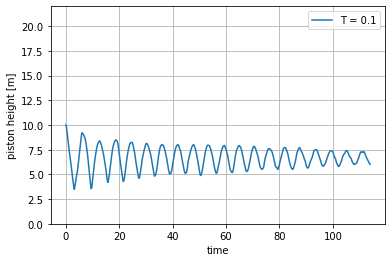

In [161]:
print(pist[1,-1])
plt.plot(pist[1,:],pist[0,:],label='T = 0.1')
plt.legend()
plt.ylabel('piston height [m]')
plt.xlabel('time')
plt.grid()
plt.ylim(0,22)
plt.show()

## 2020.03.10 rewrite calc_hit_time function

- calculating t1 and t2 is unneccesary, and doing all the comparisons is unneccessary aswell. MAX_INT is never used since t2 is always positive
- all of the if and else statements could be deleted and the hit time simply assigned to t1
- the idea of neglecting t1 came from Elene
- having a lot less control statements made the code a lot faster

In [39]:
def calc_hit_time(part_pos, part_vel, pist_height, pist_vel):
    hit_time = np.zeros((N,4))   
    min_t = 0
    part_no = 0
    is_pist = False
    # MAX_INT represents the hit time when the particle would never hit that wall
    for i in range(N):      
        # going to +X
        if(part_vel[i,0]>0):
            hit_time[i,0] = (box_width-part_pos[i,0])/abs(part_vel[i,0])
            hit_time[i,1] = MAX_INT      
        # going to -X
        else:
            hit_time[i,1] = part_pos[i,0]/abs(part_vel[i,0])
            hit_time[i,0] = MAX_INT
            
        # hit with the bottom
        if part_vel[i,1]<0:
            hit_time[i,3] = part_pos[i,1]/abs(part_vel[i,1])
        else:
            hit_time[i,3] = MAX_INT
        
        # hit with the piston
        t = (-(pist_vel-part_vel[i,1])-np.sqrt((pist_vel-part_vel[i,1])**2-4*g/2*(pist_height-part_pos[i,1])))/g
        hit_time[i,2]=t
        
    t_index = np.unravel_index(np.argmin(hit_time, axis=None), hit_time.shape)
    min_t = hit_time[t_index]
    if(t_index[1]==2):
        is_pist = True
    
    return min_t, t_index, is_pist

## 2021.03.11 Save data to txt, read data and plot

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
arr1 = np.array([[1,2,3,4,5,6,7,8,9],[1,2,3,4,5,6,7,8,9]])
np.savetxt('test3.txt', arr1, delimiter=',')  

In [30]:
arr2 = np.loadtxt('test3.txt', delimiter=',')
print(arr2)

[[1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 2. 3. 4. 5. 6. 7. 8. 9.]]


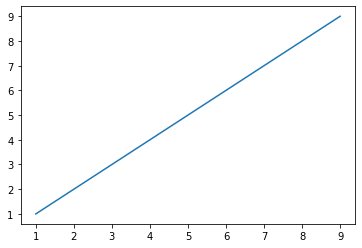

In [31]:
plt.plot(arr2[0],arr2[1])
plt.show()

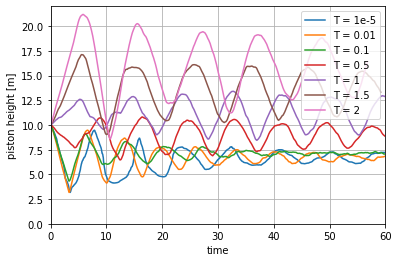

In [167]:
plt.plot(arr7[1,:],arr6[0,:],label='T = 1e-5')
plt.plot(arr6[1,:],arr6[0,:],label='T = 0.01')
plt.plot(arr5[1,:],arr5[0,:],label='T = 0.1')
plt.plot(arr4[1,:],arr4[0,:],label='T = 0.5')
plt.plot(arr1[1,:],arr1[0,:],label='T = 1')
plt.plot(arr2[1,:],arr2[0,:],label='T = 1.5')
plt.plot(arr3[1,:],arr3[0,:],label='T = 2')

plt.legend(loc='best')
plt.ylabel('piston height [m]')
plt.xlabel('time')
plt.grid()
plt.ylim(0,22)
plt.xlim(0,60)
plt.show()

In [96]:
np.savetxt('T1_m01.txt', pist, delimiter=',') 
arr1 = np.loadtxt('T1_m01.txt', delimiter=',')

In [102]:
np.savetxt('T2_m01.txt', pist, delimiter=',')
arr2 = np.loadtxt('T2_m02.txt', delimiter=',')

In [109]:
np.savetxt('T3_m01.txt', pist, delimiter=',')
arr3 = np.loadtxt('T3_m03.txt', delimiter=',')

In [127]:
np.savetxt('T05_m01.txt', pist, delimiter=',')
arr4 = np.loadtxt('T05_m03.txt', delimiter=',')

In [139]:
np.savetxt('T01_m01.txt', pist, delimiter=',')
arr5 = np.loadtxt('T01_m03.txt', delimiter=',')

In [148]:
np.savetxt('T001_m01.txt', pist, delimiter=',')
arr6 = np.loadtxt('T001_m03.txt', delimiter=',')

In [163]:
np.savetxt('T1e-5_m01.txt', pist, delimiter=',')
arr7 = np.loadtxt('T1e-5_m03.txt', delimiter=',')

In [170]:
plt.plot(1,np.mean(arr1[0,:]),'.')
plt.plot(1.5,np.mean(arr2[0,:]),'.')
plt.plot(2,np.mean(arr3[0,:]),'.')
plt.plot(0.5,np.mean(arr4[0,:]),'.')
plt.plot(0.1,np.mean(arr5[0,:]),'.')
plt.plot(0.01,np.mean(arr6[0,:]),'.')
plt.plot(1e-5,np.mean(arr7[0,:]),'.')
plt.xlabel('T')
plt.ylabel('average piston height')
plt.grid()
plt.show()

## 2021.03.13 Generate velocity and speed distributions
  
In three dimensions:

$P(v) = 4\pi \left({m\over 2\pi kT}\right)^{3/2} v^2 e^{-mv^2/2kT} $


In two dimensions:

$P(v) =  {m v\over  kT}  e^{-mv^2/2kT} $

  
For a velocity component:  
  
$P(v_x) =  \left({m\over 2\pi kT}\right)^{1/2} e^{-mv_x^2/2kT} $

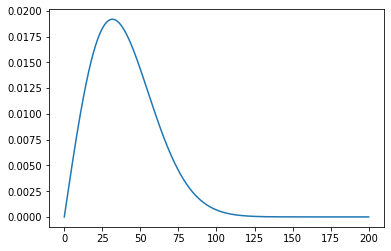

In [27]:
T = 10# K
m_part = 0.01
kB = 1

def p_maxBoltz(v):
    p = 4*np.pi*(m_part/(2*np.pi*kB*T))**(3/2)*v**2*np.exp(-m_part*v**2/(2*kB*T))
    return p

def p_maxBoltz2D(v):
    p = (m_part*v/(kB*T))*np.exp(-m_part*v**2/(2*kB*T))
    return p

def p_oneDir(v):
    p = np.sqrt(m_part/(2*np.pi*kB*T))*np.exp(-m_part*v**2/(2*kB*T))
    return p

v = np.linspace(0,200,1000)
p_v = p_maxBoltz2D(v)
plt.plot(v,p_v)
plt.show()

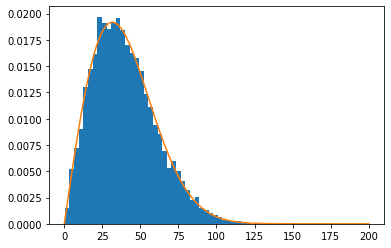

In [9]:
mu = 0
sigma = np.sqrt(kB*T/m_part)
vel_x = np.random.normal(mu,sigma, 10000)
vel_y = np.random.normal(mu,sigma, 10000)
vel_z = np.random.normal(mu,sigma, 10000)
vel = np.sqrt(vel_x**2+vel_y**2)
plt.hist(vel,bins=50,density=True)
plt.plot(v,p_v)
plt.show()

## 2020.03.14 Implement velocity distribution to code

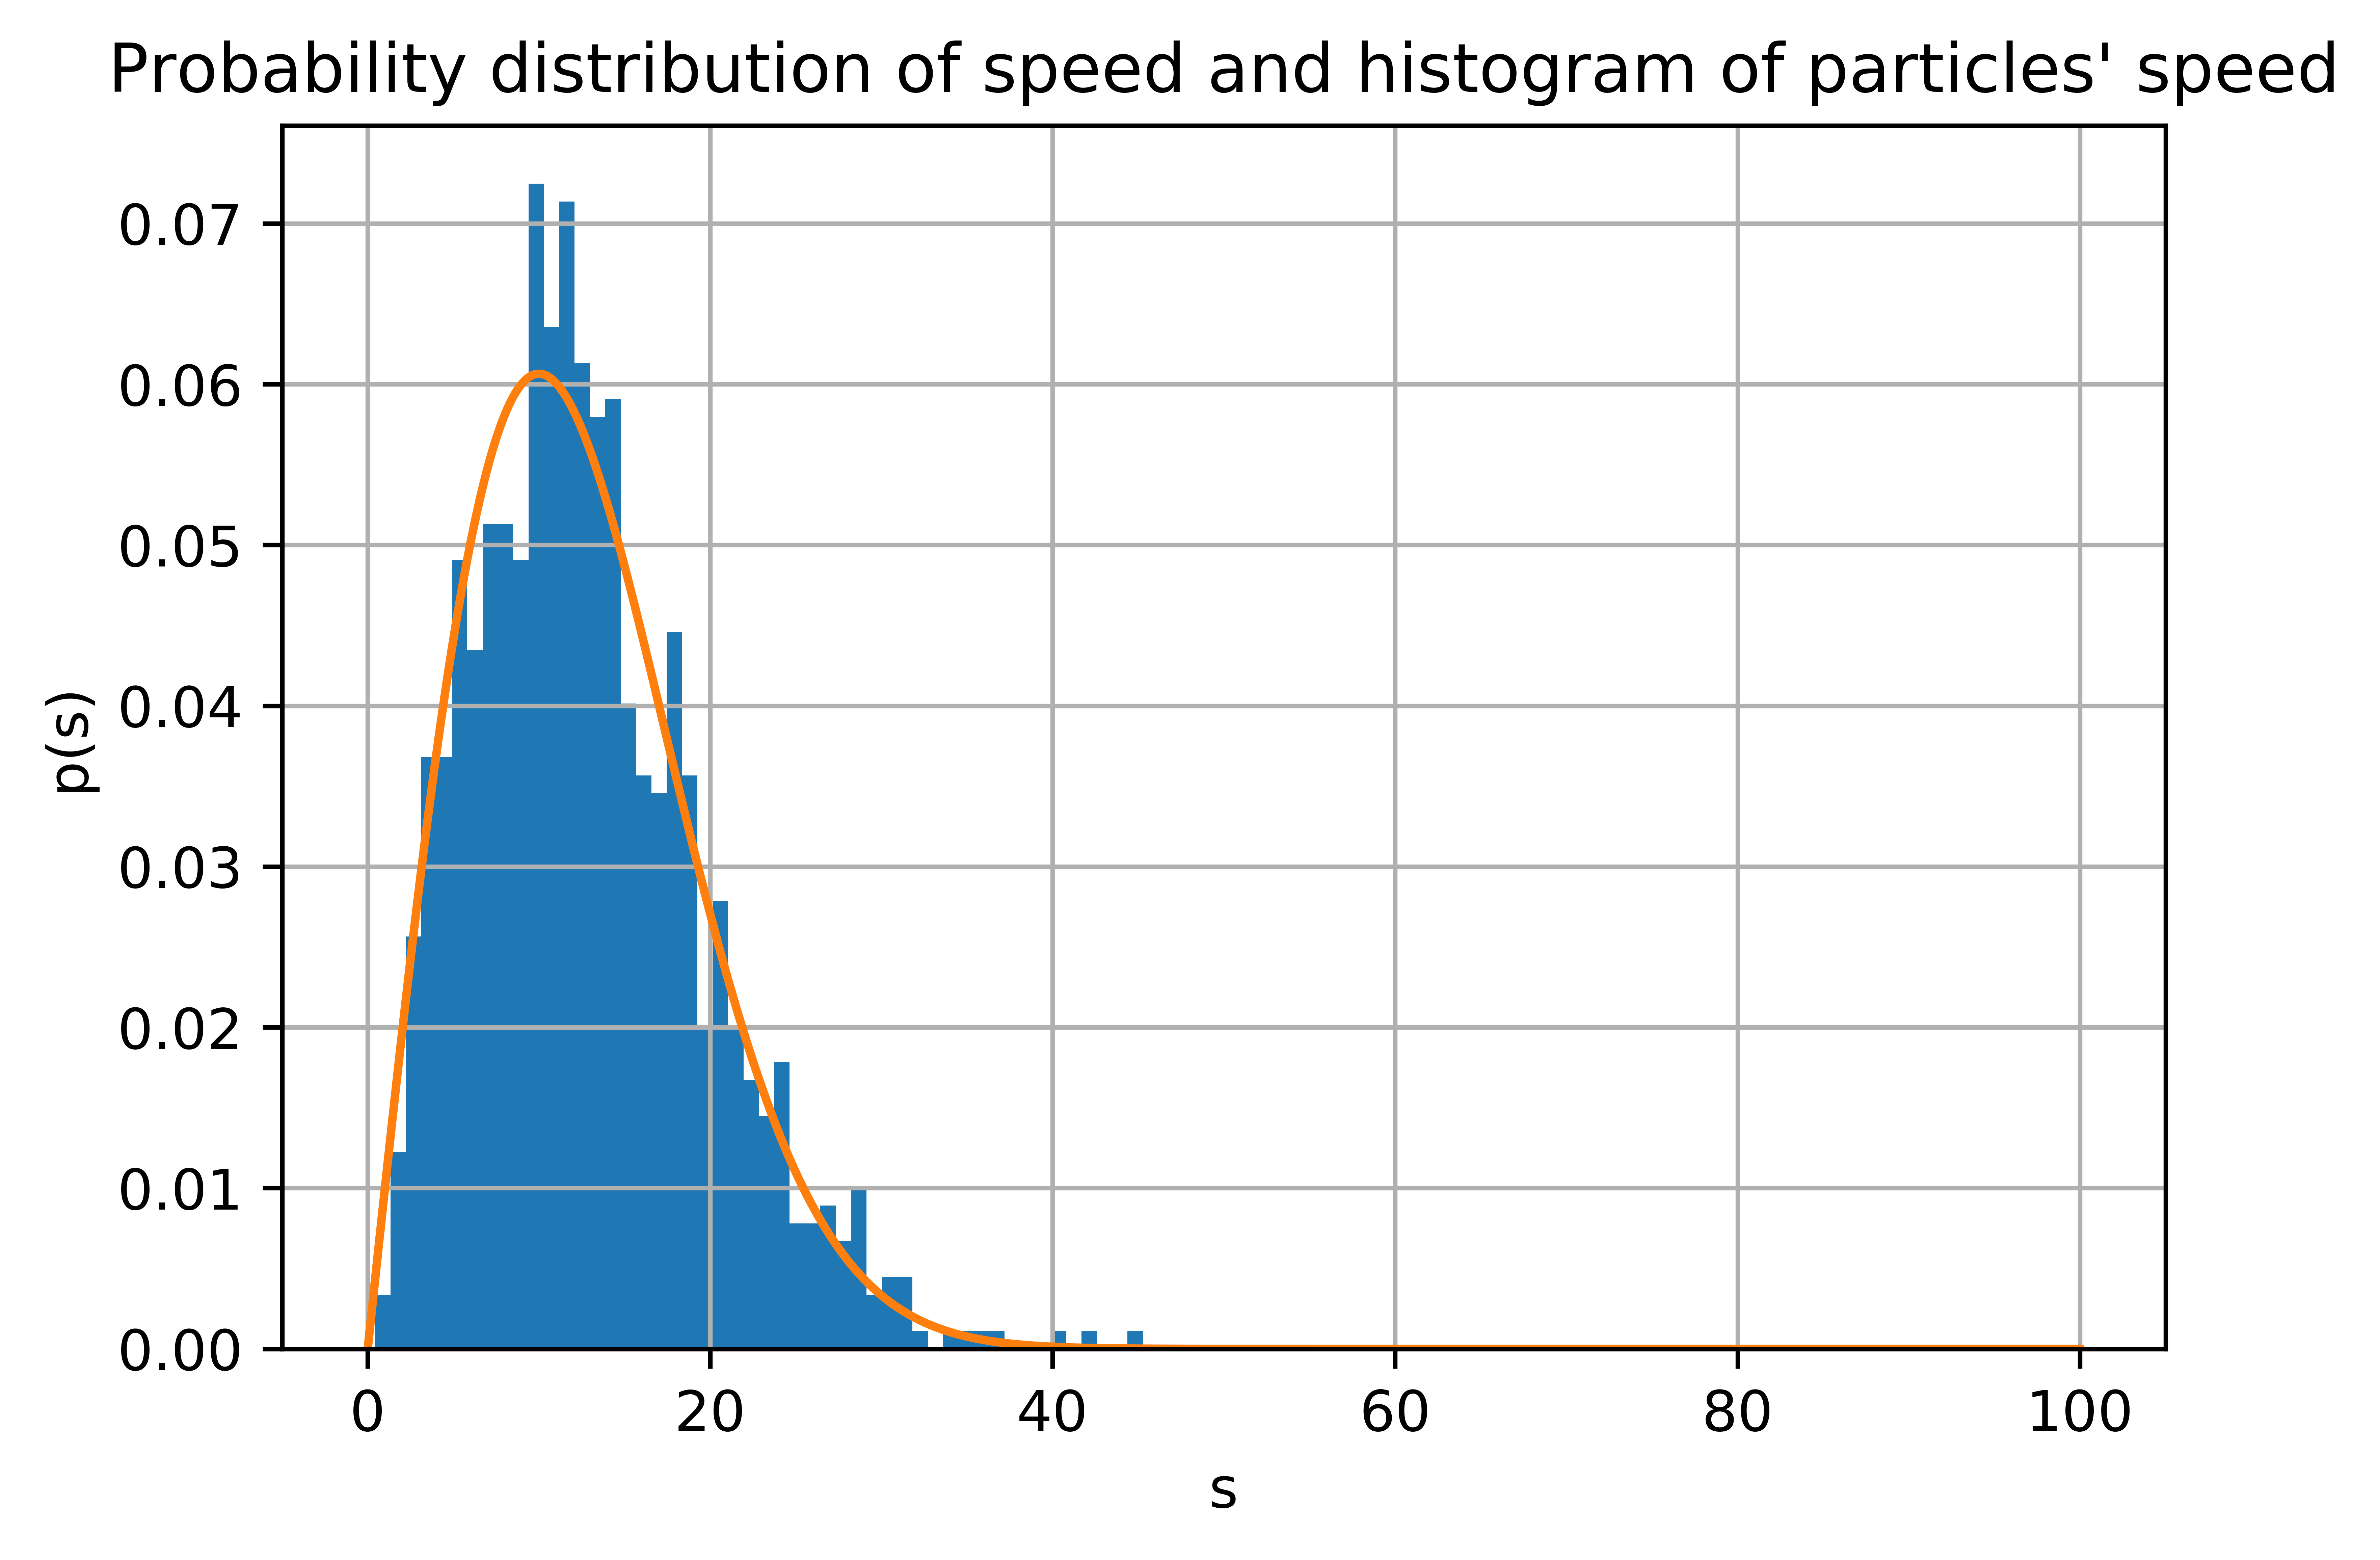

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
kB = 1
g = -9.81 # m/s^2
T = 10 # K
m_part = 0.1  # kg
m_pist = 10 # kg
N = 1000 # number of particles
box_width = 10  # m
MAX_INT = 9999999
max_y = 10 # maximum height where the particles can be initialised

pist_height = 10  # m
pist_vel = 0 
part_pos = np.random.rand(N,2) # m
part_vel = np.random.rand(N,2) # m/s

mu = 0
sigma = np.sqrt(kB*T/m_part)


# Initialize positions and velocities for particles

# Velocity using the velocity distribution
part_vel[:,0] = np.random.normal(mu,sigma, N)
part_vel[:,1] = np.random.normal(mu,sigma, N)
# Position
part_pos[:,0] = part_pos[:,0]*box_width
part_pos[:,1] = part_pos[:,1]*max_y



# Plot the velocity distribution 
v = np.linspace(-50,50,2000)
def p_oneDir(v):
    p = np.sqrt(m_part/(2*np.pi*kB*T))*np.exp(-m_part*v**2/(2*kB*T))
    return p
p_v = p_oneDir(v)
plt.hist(part_vel[:,0],bins=50,density = True)
plt.grid()
plt.plot(v,p_v)
plt.title("Probability distribution of velocities and histogram of generated velocities")
plt.xlabel('v')
plt.ylabel('p(v)')
plt.show()

# Plot the speed distribution and speeds
def p_maxBoltz2D(v):
    p = (m_part*v/(kB*T))*np.exp(-m_part*v**2/(2*kB*T))
    return p
v = np.linspace(0,100,1000)
p_v = p_maxBoltz2D(v)
plt.figure(dpi=1200)
plt.hist(np.sqrt(part_vel[:,0]**2+part_vel[:,1]**2),bins=50,density = True)
plt.plot(v,p_v)
plt.grid()
plt.title("Probability distribution of speed and histogram of particles' speed")
plt.xlabel('s')
plt.ylabel('p(s)')
plt.savefig("pic10.png")

## 2021.03.17 Plan formal report

intro: 
    - general intro to MD
    - what king of sim
    - what is investigated
    
theory: 
    - PV=nRT
    - kinetic theory of gases, Boltzmann dist
    - E/Mom conservation, collision problem
    
method: 
    - dt calculations 
    - explain code(add code/flowchart?)
    - performace??
    - dt against # particles
    - snapshots of piston and particles
    - runtime against # steps in sumulation
    - runtime against # particles for same # steps
    - dt against T and/or N particles
    
results: 
    - h against T for multiple T
    - h against n for multiple n
    - h against T for multiple m_pist(basically pressures) 
    - avg h against T for lot of T
    - avg h against n for lot of n
    - avg h against m_pist lot of m_pist
    - How does same T but diff m_part effect behav?

Simulation time: 5
Wall time: 3.39 s


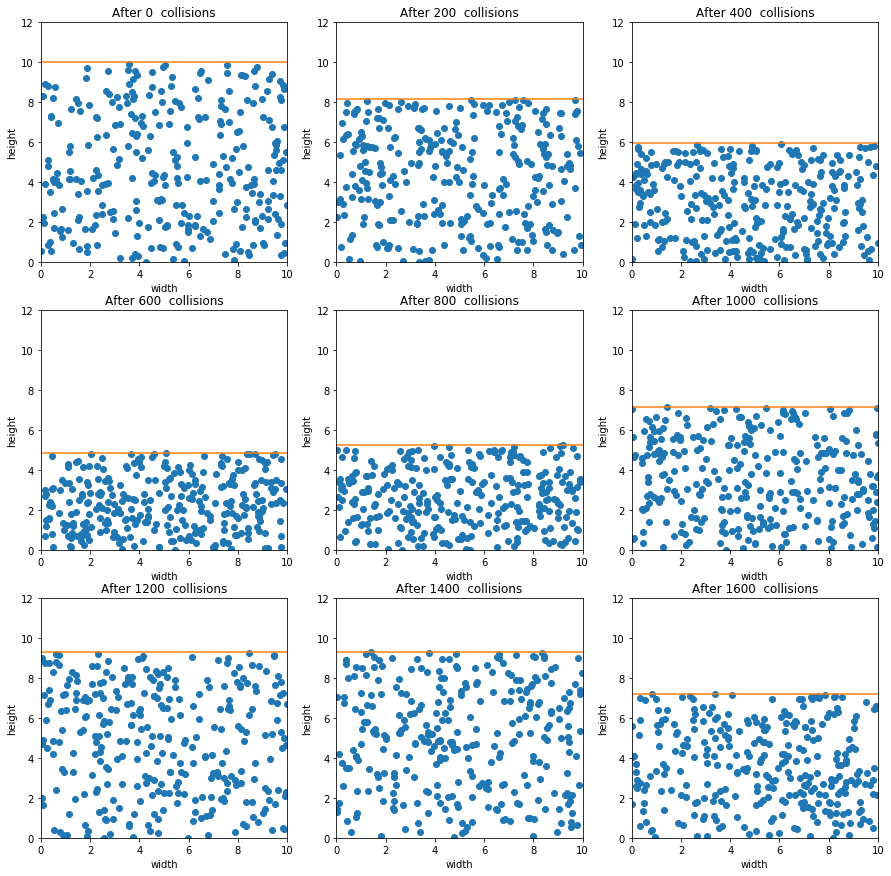

In [110]:
%%time

# Parameters
kB = 1 
g = -9.81 # m/s^2
T = 2 # K
m_part = 0.1  # kg
m_pist = 20 # kg
N = 300 # number of particles
box_width = 10  # m
MAX_INT = 9999999
max_y = 10 # maximum height where the particles can be initialised

# Store values for one timestep
pist_height = 10  # m
pist_vel = 0 
part_pos = np.random.rand(N,2) # m
part_vel = np.random.rand(N,2) # m/s

mu = 0
sigma = np.sqrt(kB*T/m_part)

# Initialize positions and velocities for particles

# Velocity using the velocity distribution
part_vel[:,0] = np.random.normal(mu,sigma, N)
part_vel[:,1] = np.random.normal(mu,sigma, N)
# Position
part_pos[:,0] = part_pos[:,0]*box_width
part_pos[:,1] = part_pos[:,1]*max_y

# Number of timesteps
No=1799

# Arrays to save data every timestep
pist_v= np.zeros((No+1,2))
pist_h = np.zeros(No+1)
part_v = np.zeros((No+1,N,2))
t = np.zeros(No+1)
pist_h[0] = pist_height
part_v[0] = part_vel

fig = plt.figure(figsize=(15,15))
index=1
for j in range(No):

    # Calculate hit times
    min_t, t_index, isPist = calc_hit_time(part_pos, part_vel, pist_height, pist_vel)
     
    # Plot system before collision   
    #if(j%200==0):
        #plot_system(part_pos, part_vel, t_index, j, pist_height,pist_vel)
        #index+=1
    
    # Recalculate positions and pist vel after min time
    part_pos = part_pos+part_vel*min_t
    pist_height = pist_height + pist_vel*min_t + g/2*min_t**2
    pist_vel = pist_vel+g*min_t

    # Recalculate velocity, check if the hit is with the piston or the other walls
    if(isPist):
        temp = part_vel[t_index[0],1]
        part_vel[t_index[0],1]=(m_part-m_pist)/(m_part+m_pist)*temp+2*m_pist/(m_part+m_pist)*pist_vel
        # Place particle bit under the piston so its not left behind
        part_pos[t_index[0],1]=pist_height-0.01
        pist_vel=2*m_part/(m_part+m_pist)*temp+(m_pist-m_part)/(m_pist+m_part)*pist_vel
    else:
        if (t_index[1]==0 or t_index[1]==1):
            part_vel[t_index[0],0] = -part_vel[t_index[0],0]
        else:
            part_vel[t_index[0],1] = -part_vel[t_index[0],1]
    # Save data for plotting
    pist_h[j+1] = pist_height
    pist_v[j+1] = pist_vel
    part_v[j+1] = part_vel
    t[j+1]=t[j]+min_t
    if(j%200==0):
        ax = fig.add_subplot(3,3,index)
        ax.plot(part_pos[:,0],part_pos[:,1],"o")
        ax.plot((0,box_width),(pist_height, pist_height)) 
        ax.set_title("After "+str(j)+"  collisions")
        ax.set_xlabel("width")
        ax.set_ylabel("height")
        ax.set_xlim(0,box_width)
        ax.set_ylim(0,12)
        index+=1
plt.savefig('piston.jpg')
print("Simulation time: " + str(int(t[-1])))

In [34]:
import time

In [81]:
a = time.time()
for i in range(1000):
    print(i)
b = time.time()

a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


# Code to reproduce plots from the report

In [96]:
def plot_system(part_pos, part_vel, t_index, i, pist_height,pist_vel):
    # Plot the positions
    text = np.zeros(N,dtype="object")
    plt.rcParams['figure.figsize'] = [4, 4*1.2] 
    plt.plot(part_pos[:,0],part_pos[:,1],"o")
    plt.plot(part_pos[t_index[0],0], part_pos[t_index[0],1],"o",color='red')
    plt.plot((0,box_width),(pist_height, pist_height)) 
    plt.title("After "+str(i)+" number of collisions")
    plt.xlabel("width")
    plt.ylabel("height")
    plt.xlim(0,box_width)
    plt.ylim(0,12)
    
    # Plot part No and velocity 
    #for i in range(N):
        #plt.text(part_pos[i,0]+0.2, part_pos[i,1], i)
    plt.quiver(part_pos[:,0],part_pos[:,1],part_vel[:,0],part_vel[:,1])
    plt.quiver(box_width/2,pist_height,0,pist_vel)
    plt.show()

In [ ]:
def calc_hit_time(part_pos, part_vel, pist_height, pist_vel):
    hit_time = np.zeros((N,4))   
    min_t = 0
    part_no = 0
    is_pist = False
    # MAX_INT represents the hit time when the particle would never hit that wall
    for i in range(N):      
        # going to +X
        if(part_vel[i,0]>0):
            hit_time[i,0] = (box_width-part_pos[i,0])/abs(part_vel[i,0])
            hit_time[i,1] = MAX_INT      
        # going to -X
        else:
            hit_time[i,1] = part_pos[i,0]/abs(part_vel[i,0])
            hit_time[i,0] = MAX_INT
            
        # hit with the bottom
        if part_vel[i,1]<0:
            hit_time[i,3] = part_pos[i,1]/abs(part_vel[i,1])
        else:
            hit_time[i,3] = MAX_INT
        
        # hit with the piston
        t = (-(pist_vel-part_vel[i,1])-np.sqrt((pist_vel-part_vel[i,1])**2-4*g/2*(pist_height-part_pos[i,1])))/g
        hit_time[i,2]=t
        
    t_index = np.unravel_index(np.argmin(hit_time, axis=None), hit_time.shape)
    min_t = hit_time[t_index]
    if(t_index[1]==2):
        is_pist = True
    
    return min_t, t_index, is_pist

## For different temperatures

In [ ]:
%%time
Temp = np.array([1e-5,1,5,10,30,40,50,60,70,80,90])
avg_h = np.zeros(int(Temp.size))
plt.figure(dpi=1200)
for i in range(Temp.size):

    # Parameters
    kB = 1 
    g = -9.81 # m/s^2
    T = Temp[i] # K
    m_part = 0.1  # kg
    m_pist = 10 # kg
    N = 1000 # number of particles
    box_width = 10  # m
    MAX_INT = 9999999
    max_y = 10 # maximum height where the particles can be initialised

    # Store values for one timestep
    pist_height = 10  # m
    pist_vel = 0 
    part_pos = np.random.rand(N,2) # m
    part_vel = np.random.rand(N,2) # m/s

    mu = 0
    sigma = np.sqrt(kB*T/m_part)

    # Initialize positions and velocities for particles

    # Velocity using the velocity distribution
    part_vel[:,0] = np.random.normal(mu,sigma, N)
    part_vel[:,1] = np.random.normal(mu,sigma, N)
    # Position
    part_pos[:,0] = part_pos[:,0]*box_width
    part_pos[:,1] = part_pos[:,1]*max_y

    # Number of timesteps
    No=75000

    # Arrays to save data every timestep
    pist_v= np.zeros((No+1,2))
    pist_h = np.zeros(No+1)
    part_v = np.zeros((No+1,N,2))
    t = np.zeros(No+1)
    pist_h[0] = pist_height
    part_v[0] = part_vel

    for j in range(No):

        # Calculate hit times
        min_t, t_index, isPist = calc_hit_time(part_pos, part_vel, pist_height, pist_vel)
     
        # Plot system before collision   
        #if(j%3000==0):
            #plot_system(part_pos, part_vel, t_index, j, pist_height,pist_vel)
    
        # Recalculate positions and pist vel after min time
        part_pos = part_pos+part_vel*min_t
        pist_height = pist_height + pist_vel*min_t + g/2*min_t**2
        pist_vel = pist_vel+g*min_t

        # Recalculate velocity, check if the hit is with the piston or the other walls
        if(isPist):
            temp = part_vel[t_index[0],1]
            part_vel[t_index[0],1]=(m_part-m_pist)/(m_part+m_pist)*temp+2*m_pist/(m_part+m_pist)*pist_vel
            # Place particle bit under the piston so its not left behind
            part_pos[t_index[0],1]=pist_height-0.01
            pist_vel=2*m_part/(m_part+m_pist)*temp+(m_pist-m_part)/(m_pist+m_part)*pist_vel
        else:
            if (t_index[1]==0 or t_index[1]==1):
                part_vel[t_index[0],0] = -part_vel[t_index[0],0]
            else:
                part_vel[t_index[0],1] = -part_vel[t_index[0],1]
        # Save data for plotting
        pist_h[j+1] = pist_height
        pist_v[j+1] = pist_vel
        part_v[j+1] = part_vel
        t[j+1]=t[j]+min_t
    #title = str(i)+"th_run.txt"
    #np.savetxt(title, pist_h, delimiter=',') 
    print(T)
    plt.plot(T,np.mean(pist_h),'.',color="000000")
    #plt.legend(loc='upper right')
    plt.ylabel('Average height of piston  [m]')
    plt.xlabel('T [u]')
    #plt.ylim(0,26)
    #plt.xlim(0,50)
    plt.title("Average height of the piston for different temperatures")
plt.grid()
plt.savefig("pic1.png")

## For different pressures (piston masses)

1
3
5
10
20
30
Wall time: 24min 3s


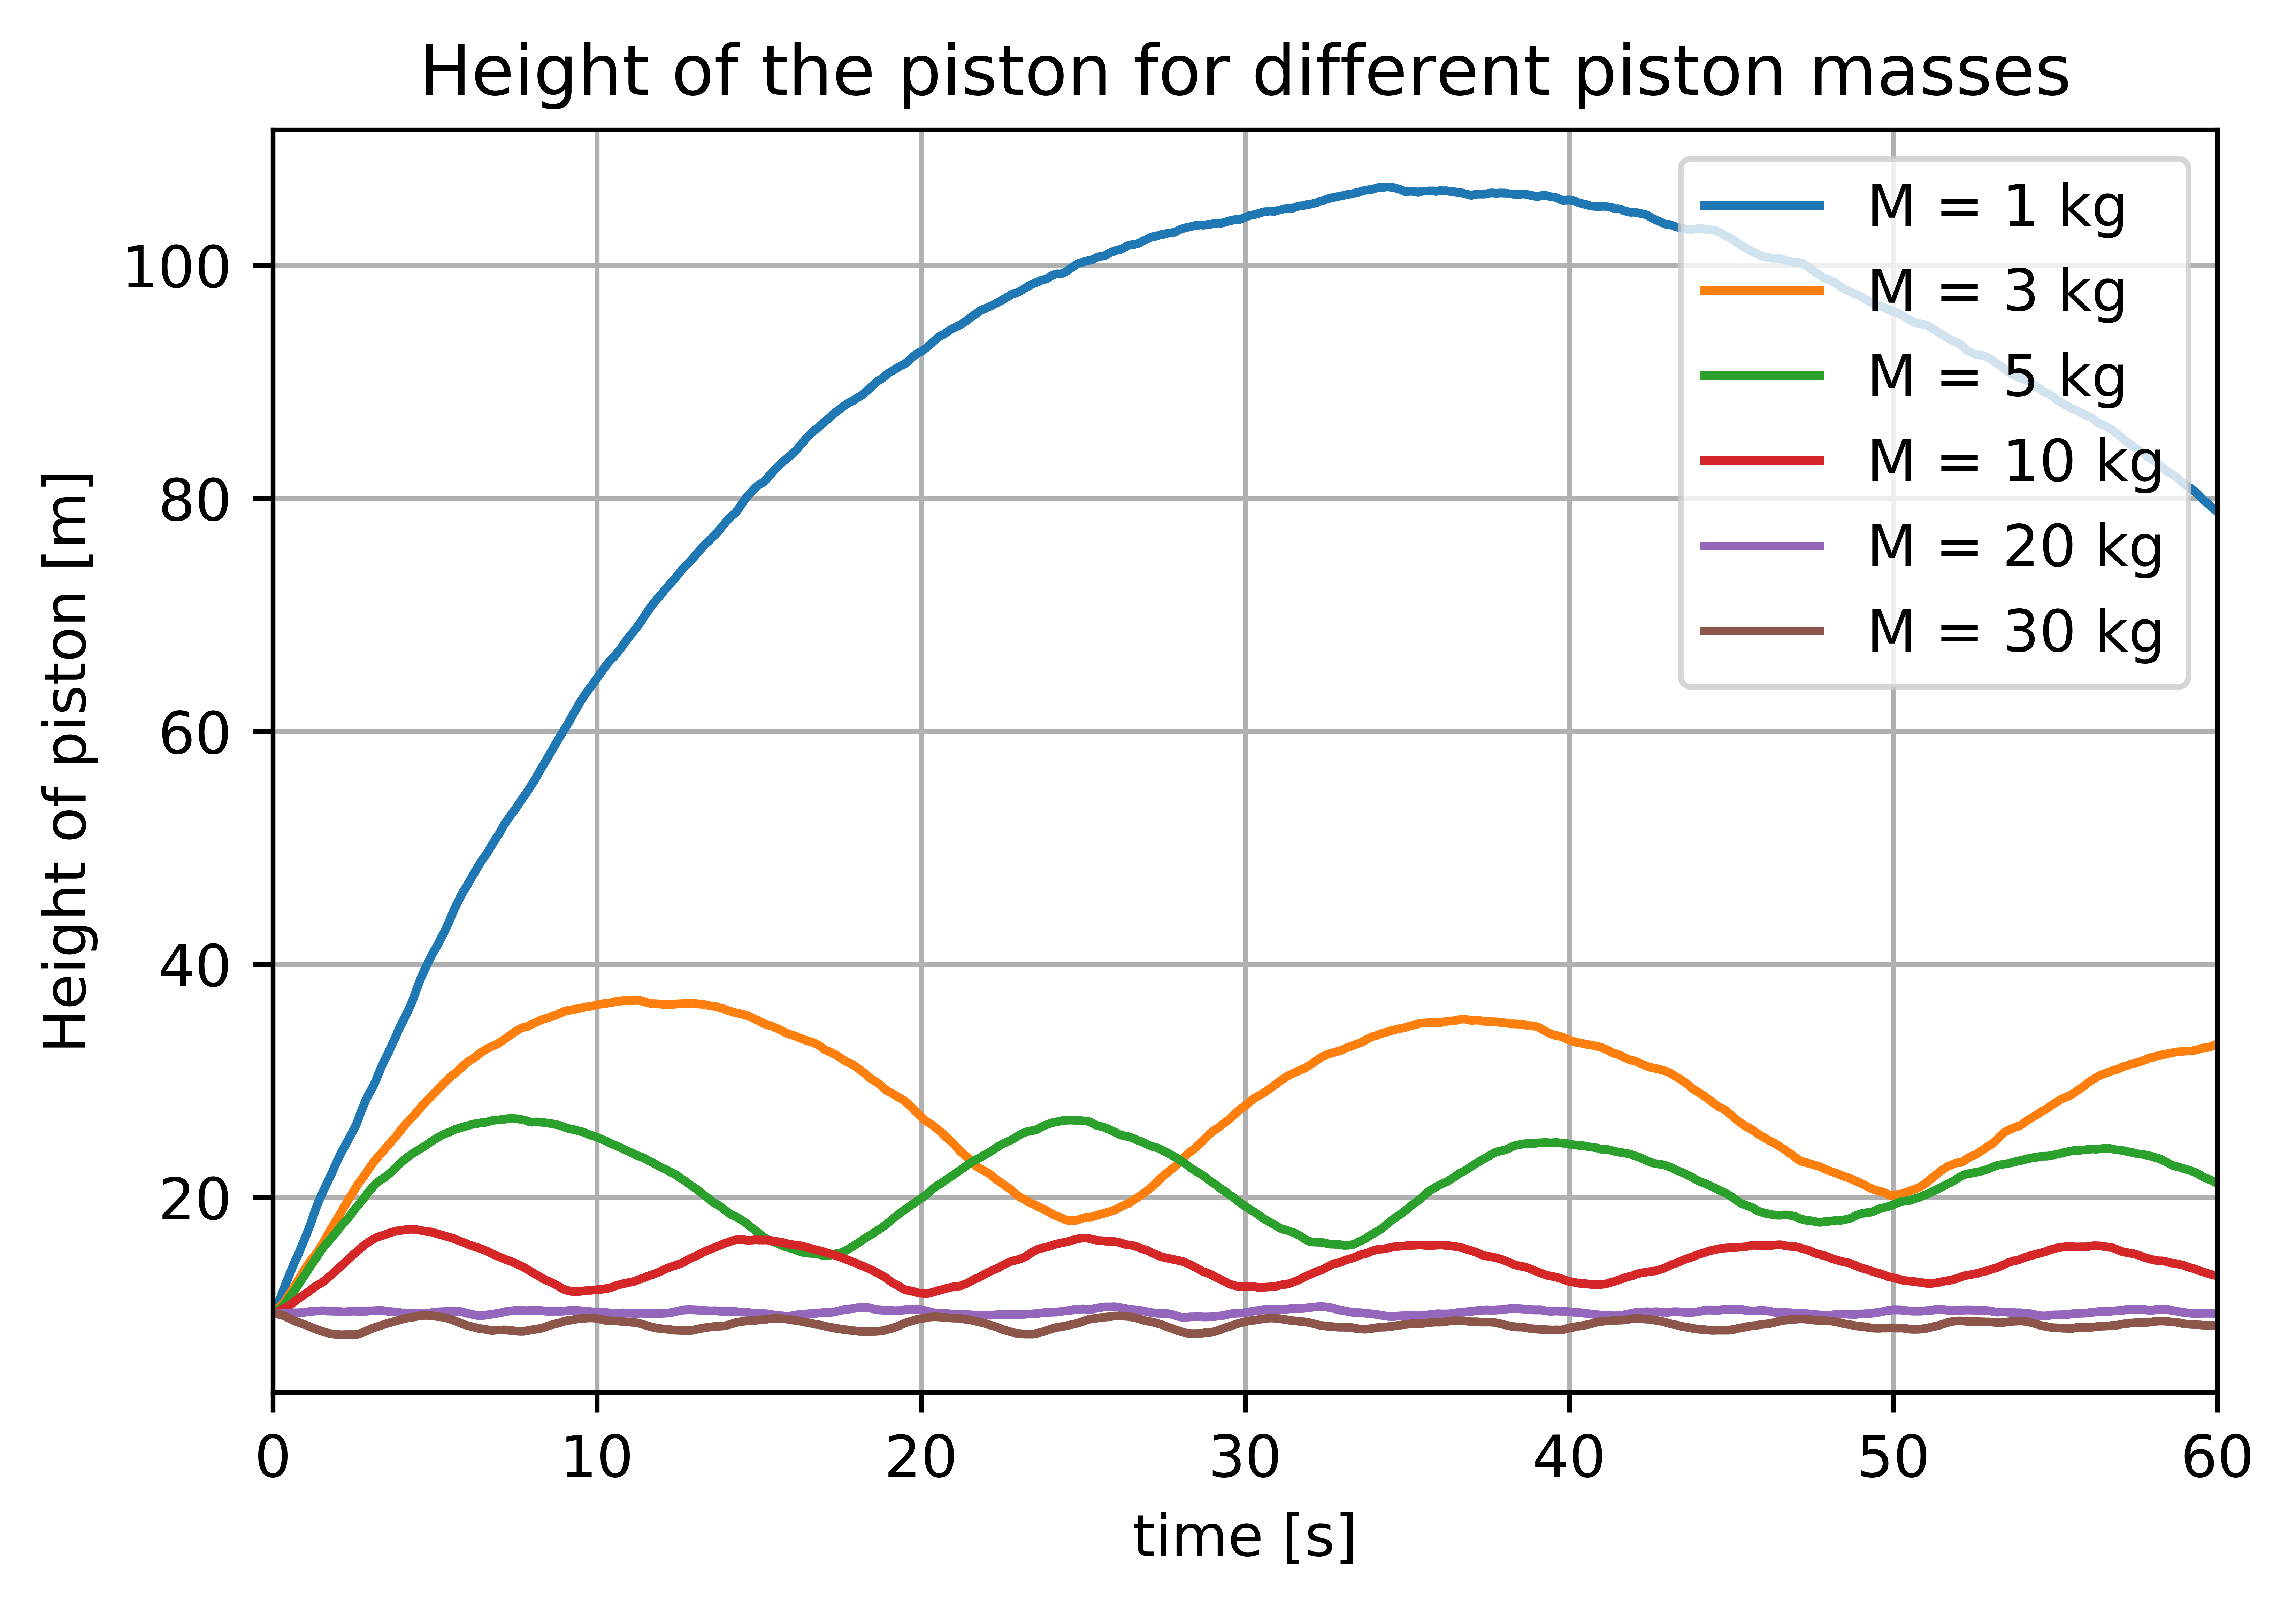

In [79]:
%%time
M = np.array([1,3,5,10,20,30])
avg_h = np.zeros(int(M.size))
plt.figure(dpi=1200)
for i in range(M.size):

    # Parameters
    kB = 1 
    g = -9.81 # m/s^2
    T = 2 # K
    m_part = 0.1  # kg
    m_pist = M[i] # kg
    N = 1000 # number of particles
    box_width = 10  # m
    MAX_INT = 9999999
    max_y = 10 # maximum height where the particles can be initialised

    # Store values for one timestep
    pist_height = 10  # m
    pist_vel = 0 
    part_pos = np.random.rand(N,2) # m
    part_vel = np.random.rand(N,2) # m/s

    mu = 0
    sigma = np.sqrt(kB*T/m_part)

    # Initialize positions and velocities for particles

    # Velocity using the velocity distribution
    part_vel[:,0] = np.random.normal(mu,sigma, N)
    part_vel[:,1] = np.random.normal(mu,sigma, N)
    # Position
    part_pos[:,0] = part_pos[:,0]*box_width
    part_pos[:,1] = part_pos[:,1]*max_y

    # Number of timesteps
    No=50000

    # Arrays to save data every timestep
    pist_v= np.zeros((No+1,2))
    pist_h = np.zeros(No+1)
    part_v = np.zeros((No+1,N,2))
    t = np.zeros(No+1)
    pist_h[0] = pist_height
    part_v[0] = part_vel

    for j in range(No):

        # Calculate hit times
        min_t, t_index, isPist = calc_hit_time(part_pos, part_vel, pist_height, pist_vel)
     
        # Plot system before collision   
        #if(j%3000==0):
            #plot_system(part_pos, part_vel, t_index, j, pist_height,pist_vel)
    
        # Recalculate positions and pist vel after min time
        part_pos = part_pos+part_vel*min_t
        pist_height = pist_height + pist_vel*min_t + g/2*min_t**2
        pist_vel = pist_vel+g*min_t

        # Recalculate velocity, check if the hit is with the piston or the other walls
        if(isPist):
            temp = part_vel[t_index[0],1]
            part_vel[t_index[0],1]=(m_part-m_pist)/(m_part+m_pist)*temp+2*m_pist/(m_part+m_pist)*pist_vel
            # Place particle bit under the piston so its not left behind
            part_pos[t_index[0],1]=pist_height-0.01
            pist_vel=2*m_part/(m_part+m_pist)*temp+(m_pist-m_part)/(m_pist+m_part)*pist_vel
        else:
            if (t_index[1]==0 or t_index[1]==1):
                part_vel[t_index[0],0] = -part_vel[t_index[0],0]
            else:
                part_vel[t_index[0],1] = -part_vel[t_index[0],1]
        # Save data for plotting
        pist_h[j+1] = pist_height
        pist_v[j+1] = pist_vel
        part_v[j+1] = part_vel
        t[j+1]=t[j]+min_t
    #title = str(i)+"th_run.txt"
    #np.savetxt(title, pist_h, delimiter=',') 
    print(M[i])
    #lab = "M = {0}".format(M[i])
    plt.plot(t,pist_h,label="M = {0} kg".format(M[i]))
    plt.legend(loc='upper right')
    plt.xlabel('time [s]')
    plt.ylabel('Height of piston [m]')
    #plt.ylim(0,26)
    plt.xlim(0,60)
    plt.title("Height of the piston for different piston masses")
plt.grid()
plt.savefig("pic2.png")

1
2
3
4
5
6
7
8
9
10
15
20
25
30
40
60
70
90
150
250
Wall time: 9min 40s


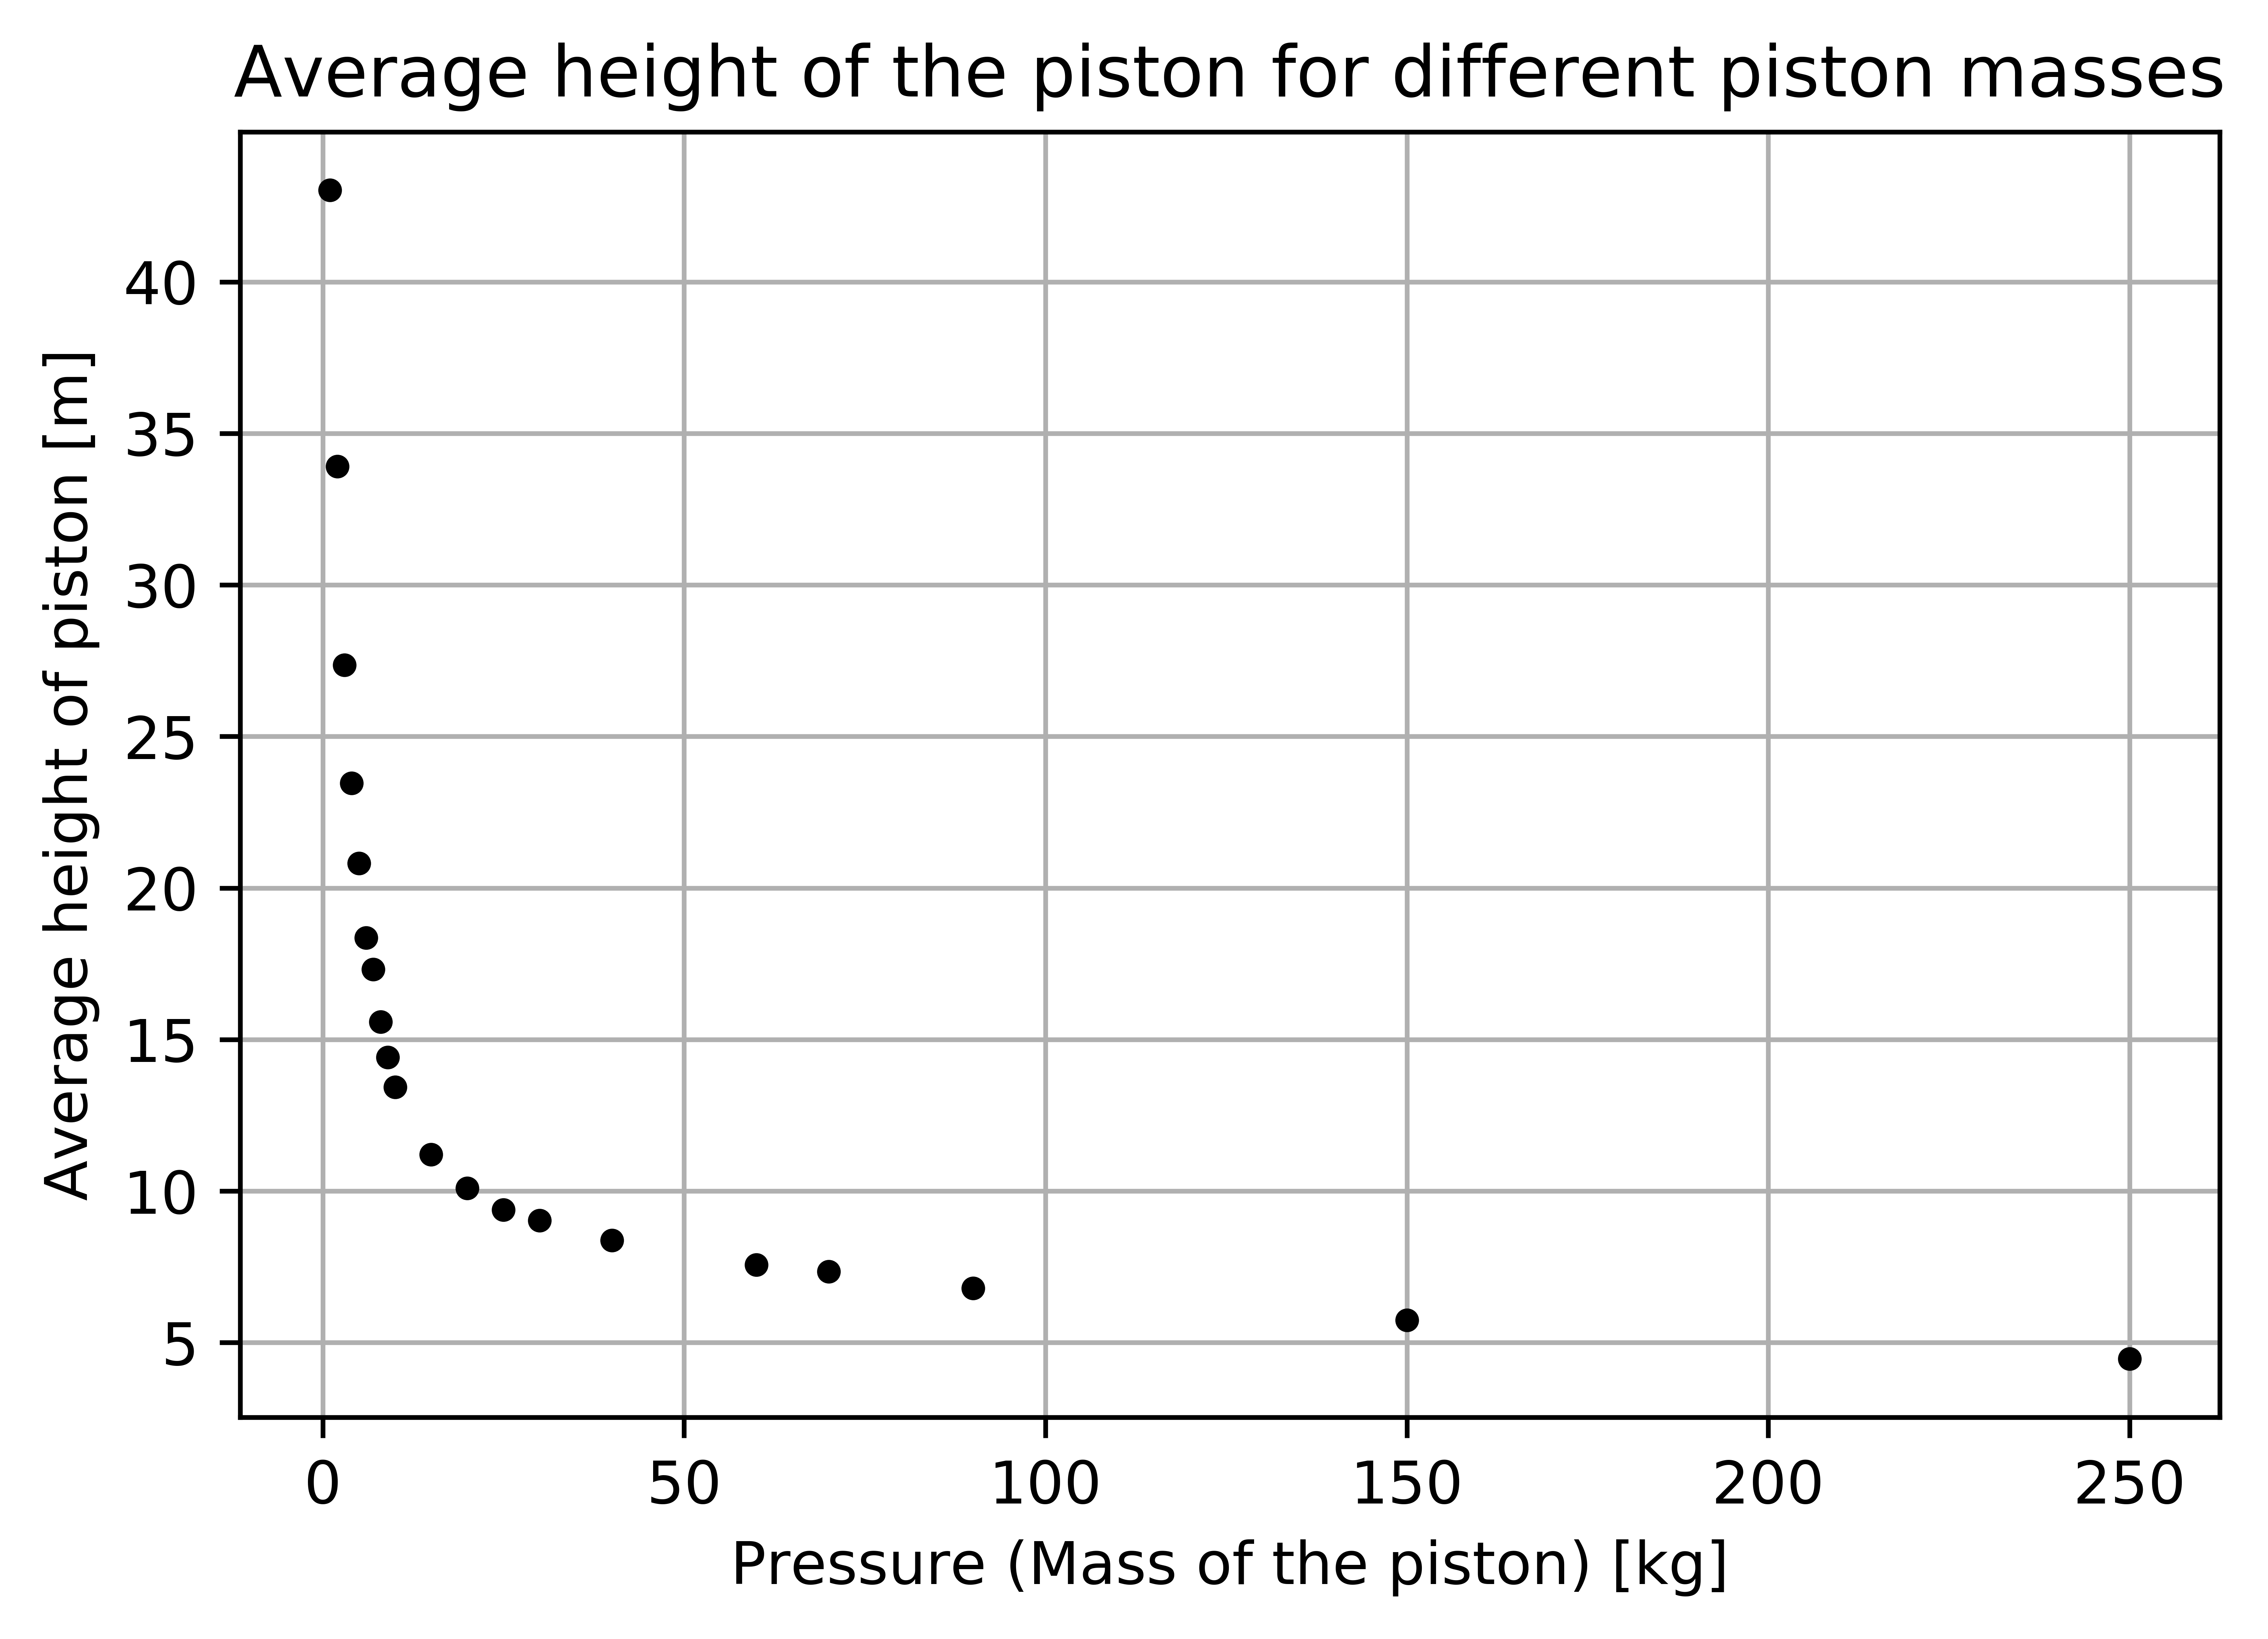

In [60]:
%%time
M = np.array([1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,60,70,90,150,250])
avg_h = np.zeros(int(M.size))
plt.figure(dpi=1200)
for i in range(M.size):

    # Parameters
    kB = 1 
    g = -9.81 # m/s^2
    T = 2 # K
    m_part = 0.1  # kg
    m_pist = M[i] # kg
    N = 1000 # number of particles
    box_width = 10  # m
    MAX_INT = 9999999
    max_y = 10 # maximum height where the particles can be initialised

    # Store values for one timestep
    pist_height = 10  # m
    pist_vel = 0 
    part_pos = np.random.rand(N,2) # m
    part_vel = np.random.rand(N,2) # m/s

    mu = 0
    sigma = np.sqrt(kB*T/m_part)

    # Initialize positions and velocities for particles

    # Velocity using the velocity distribution
    part_vel[:,0] = np.random.normal(mu,sigma, N)
    part_vel[:,1] = np.random.normal(mu,sigma, N)
    # Position
    part_pos[:,0] = part_pos[:,0]*box_width
    part_pos[:,1] = part_pos[:,1]*max_y

    # Number of timesteps
    No=5000

    # Arrays to save data every timestep
    pist_v= np.zeros((No+1,2))
    pist_h = np.zeros(No+1)
    part_v = np.zeros((No+1,N,2))
    t = np.zeros(No+1)
    pist_h[0] = pist_height
    part_v[0] = part_vel

    for j in range(No):

        # Calculate hit times
        min_t, t_index, isPist = calc_hit_time(part_pos, part_vel, pist_height, pist_vel)
     
        # Plot system before collision   
        #if(j%3000==0):
            #plot_system(part_pos, part_vel, t_index, j, pist_height,pist_vel)
    
        # Recalculate positions and pist vel after min time
        part_pos = part_pos+part_vel*min_t
        pist_height = pist_height + pist_vel*min_t + g/2*min_t**2
        pist_vel = pist_vel+g*min_t

        # Recalculate velocity, check if the hit is with the piston or the other walls
        if(isPist):
            temp = part_vel[t_index[0],1]
            part_vel[t_index[0],1]=(m_part-m_pist)/(m_part+m_pist)*temp+2*m_pist/(m_part+m_pist)*pist_vel
            # Place particle bit under the piston so its not left behind
            part_pos[t_index[0],1]=pist_height-0.01
            pist_vel=2*m_part/(m_part+m_pist)*temp+(m_pist-m_part)/(m_pist+m_part)*pist_vel
        else:
            if (t_index[1]==0 or t_index[1]==1):
                part_vel[t_index[0],0] = -part_vel[t_index[0],0]
            else:
                part_vel[t_index[0],1] = -part_vel[t_index[0],1]
        # Save data for plotting
        pist_h[j+1] = pist_height
        pist_v[j+1] = pist_vel
        part_v[j+1] = part_vel
        t[j+1]=t[j]+min_t
    #title = str(i)+"th_run.txt"
    #np.savetxt(title, pist_h, delimiter=',') 
    print(M[i])
    #lab = "M = {0}".format(M[i])
    plt.plot(M[i],np.mean(pist_h),'.',color="000000")
    #plt.legend(loc='upper right')
    plt.xlabel('Pressure (Mass of the piston) [kg]')
    plt.ylabel('Average height of piston [m]')
    #plt.ylim(0,26)
    #plt.xlim(0,60)
    plt.title("Average height of the piston for different number of particles")
    plt.grid()
plt.grid()
plt.savefig("pic3.png")

## For different number of particles

100
200
300
400
500
600
700
800
900
1000
1200
1500
Wall time: 33min 51s


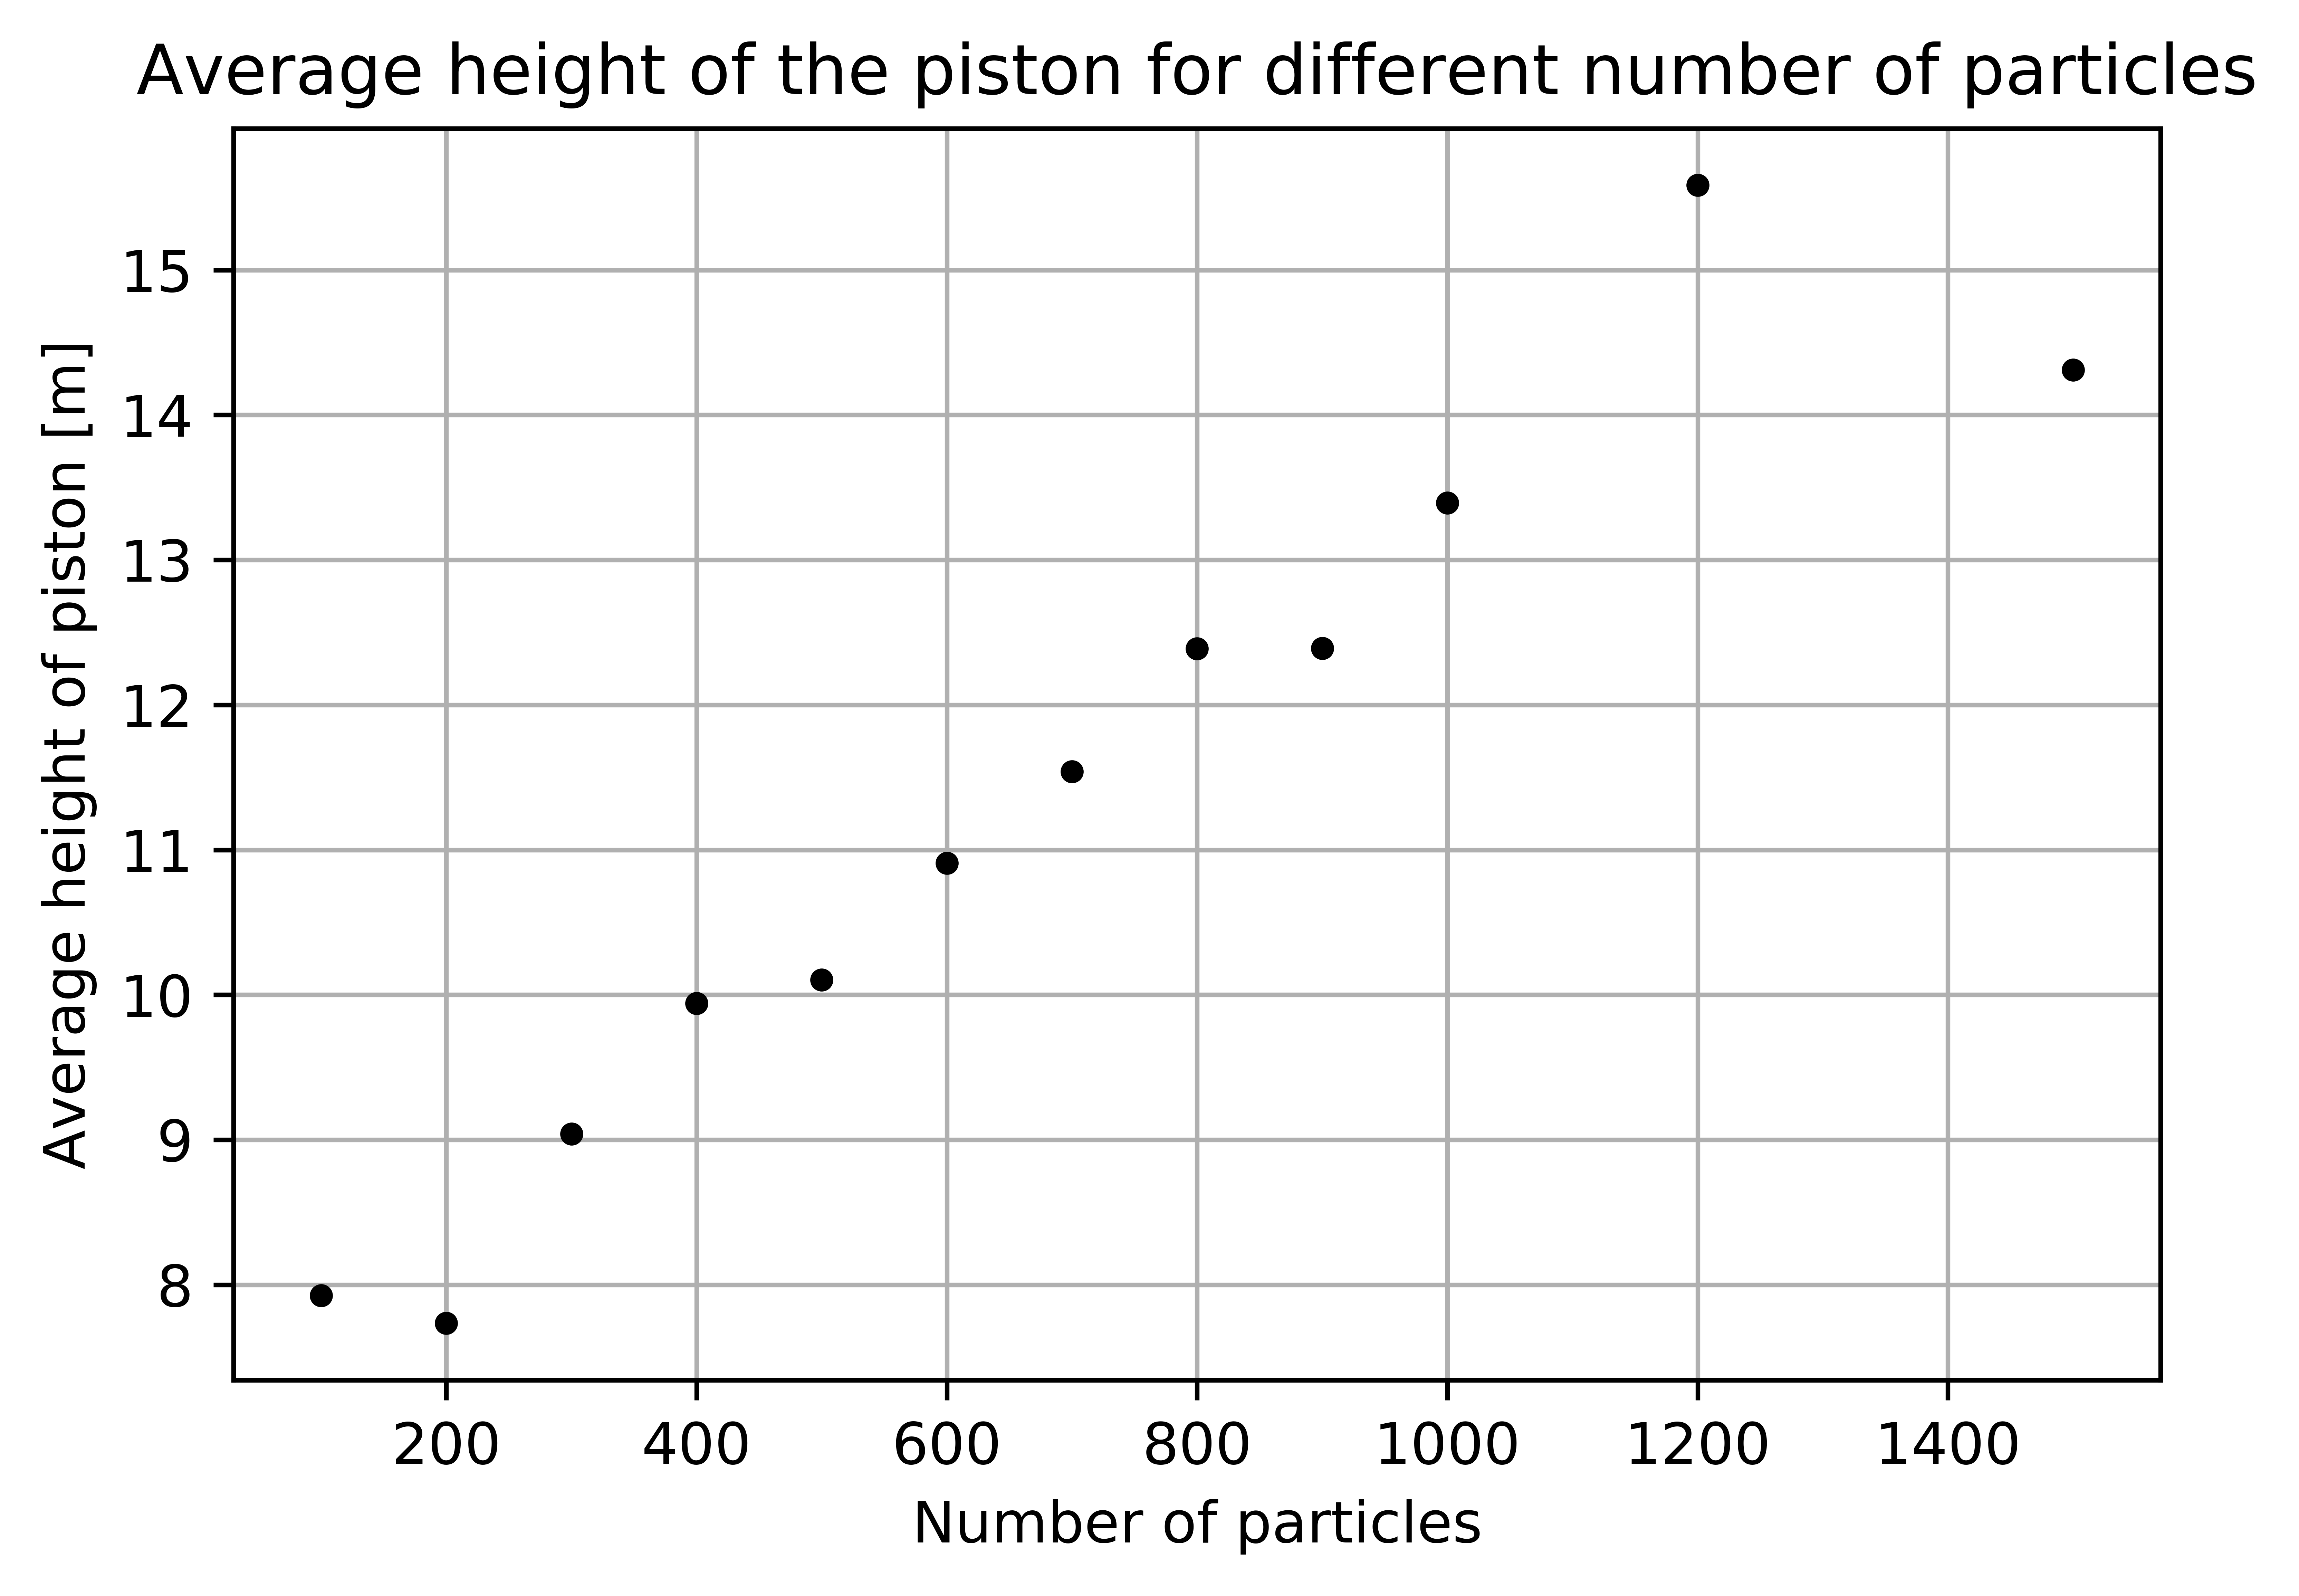

In [78]:
%%time
N_particles = np.array([100,200,300,400,500,600,700,800,900,1000,1200,1500])
avg_h = np.zeros(int(N_particles.size))
plt.figure(dpi=1200)
for i in range(N_particles.size):

    # Parameters
    kB = 1 
    g = -9.81 # m/s^2
    T = 2 # K
    m_part = 0.1  # kg
    m_pist = 10 # kg
    N = N_particles[i] # number of particles
    box_width = 10  # m
    MAX_INT = 9999999
    max_y = 10 # maximum height where the particles can be initialised

    # Store values for one timestep
    pist_height = 10  # m
    pist_vel = 0 
    part_pos = np.random.rand(N,2) # m
    part_vel = np.random.rand(N,2) # m/s

    mu = 0
    sigma = np.sqrt(kB*T/m_part)

    # Initialize positions and velocities for particles

    # Velocity using the velocity distribution
    part_vel[:,0] = np.random.normal(mu,sigma, N)
    part_vel[:,1] = np.random.normal(mu,sigma, N)
    # Position
    part_pos[:,0] = part_pos[:,0]*box_width
    part_pos[:,1] = part_pos[:,1]*max_y

    # Number of timesteps
    No=50000

    # Arrays to save data every timestep
    pist_v= np.zeros((No+1,2))
    pist_h = np.zeros(No+1)
    part_v = np.zeros((No+1,N,2))
    t = np.zeros(No+1)
    pist_h[0] = pist_height
    part_v[0] = part_vel

    for j in range(No):

        # Calculate hit times
        min_t, t_index, isPist = calc_hit_time(part_pos, part_vel, pist_height, pist_vel)
     
        # Plot system before collision   
        #if(j%3000==0):
            #plot_system(part_pos, part_vel, t_index, j, pist_height,pist_vel)
    
        # Recalculate positions and pist vel after min time
        part_pos = part_pos+part_vel*min_t
        pist_height = pist_height + pist_vel*min_t + g/2*min_t**2
        pist_vel = pist_vel+g*min_t

        # Recalculate velocity, check if the hit is with the piston or the other walls
        if(isPist):
            temp = part_vel[t_index[0],1]
            part_vel[t_index[0],1]=(m_part-m_pist)/(m_part+m_pist)*temp+2*m_pist/(m_part+m_pist)*pist_vel
            # Place particle bit under the piston so its not left behind
            part_pos[t_index[0],1]=pist_height-0.01
            pist_vel=2*m_part/(m_part+m_pist)*temp+(m_pist-m_part)/(m_pist+m_part)*pist_vel
        else:
            if (t_index[1]==0 or t_index[1]==1):
                part_vel[t_index[0],0] = -part_vel[t_index[0],0]
            else:
                part_vel[t_index[0],1] = -part_vel[t_index[0],1]
        # Save data for plotting
        pist_h[j+1] = pist_height
        pist_v[j+1] = pist_vel
        part_v[j+1] = part_vel
        t[j+1]=t[j]+min_t
    #title = str(i)+"th_run.txt"
    #np.savetxt(title, pist_h, delimiter=',') 
    print(N_particles[i])
    #lab = "M = {0}".format(M[i])
    plt.plot(N_particles[i],np.mean(pist_height),'.',color="000000")
    #plt.legend(loc='upper right')
    plt.xlabel('Number of particles')
    plt.ylabel('Average height of piston [m]')
    #plt.ylim(0,26)
    #plt.xlim(0,60)
    plt.title("Average height of the piston for different number of particles")
plt.grid()
plt.savefig("pic4.png")

100
500
1000
1200
1500
Wall time: 11min 1s


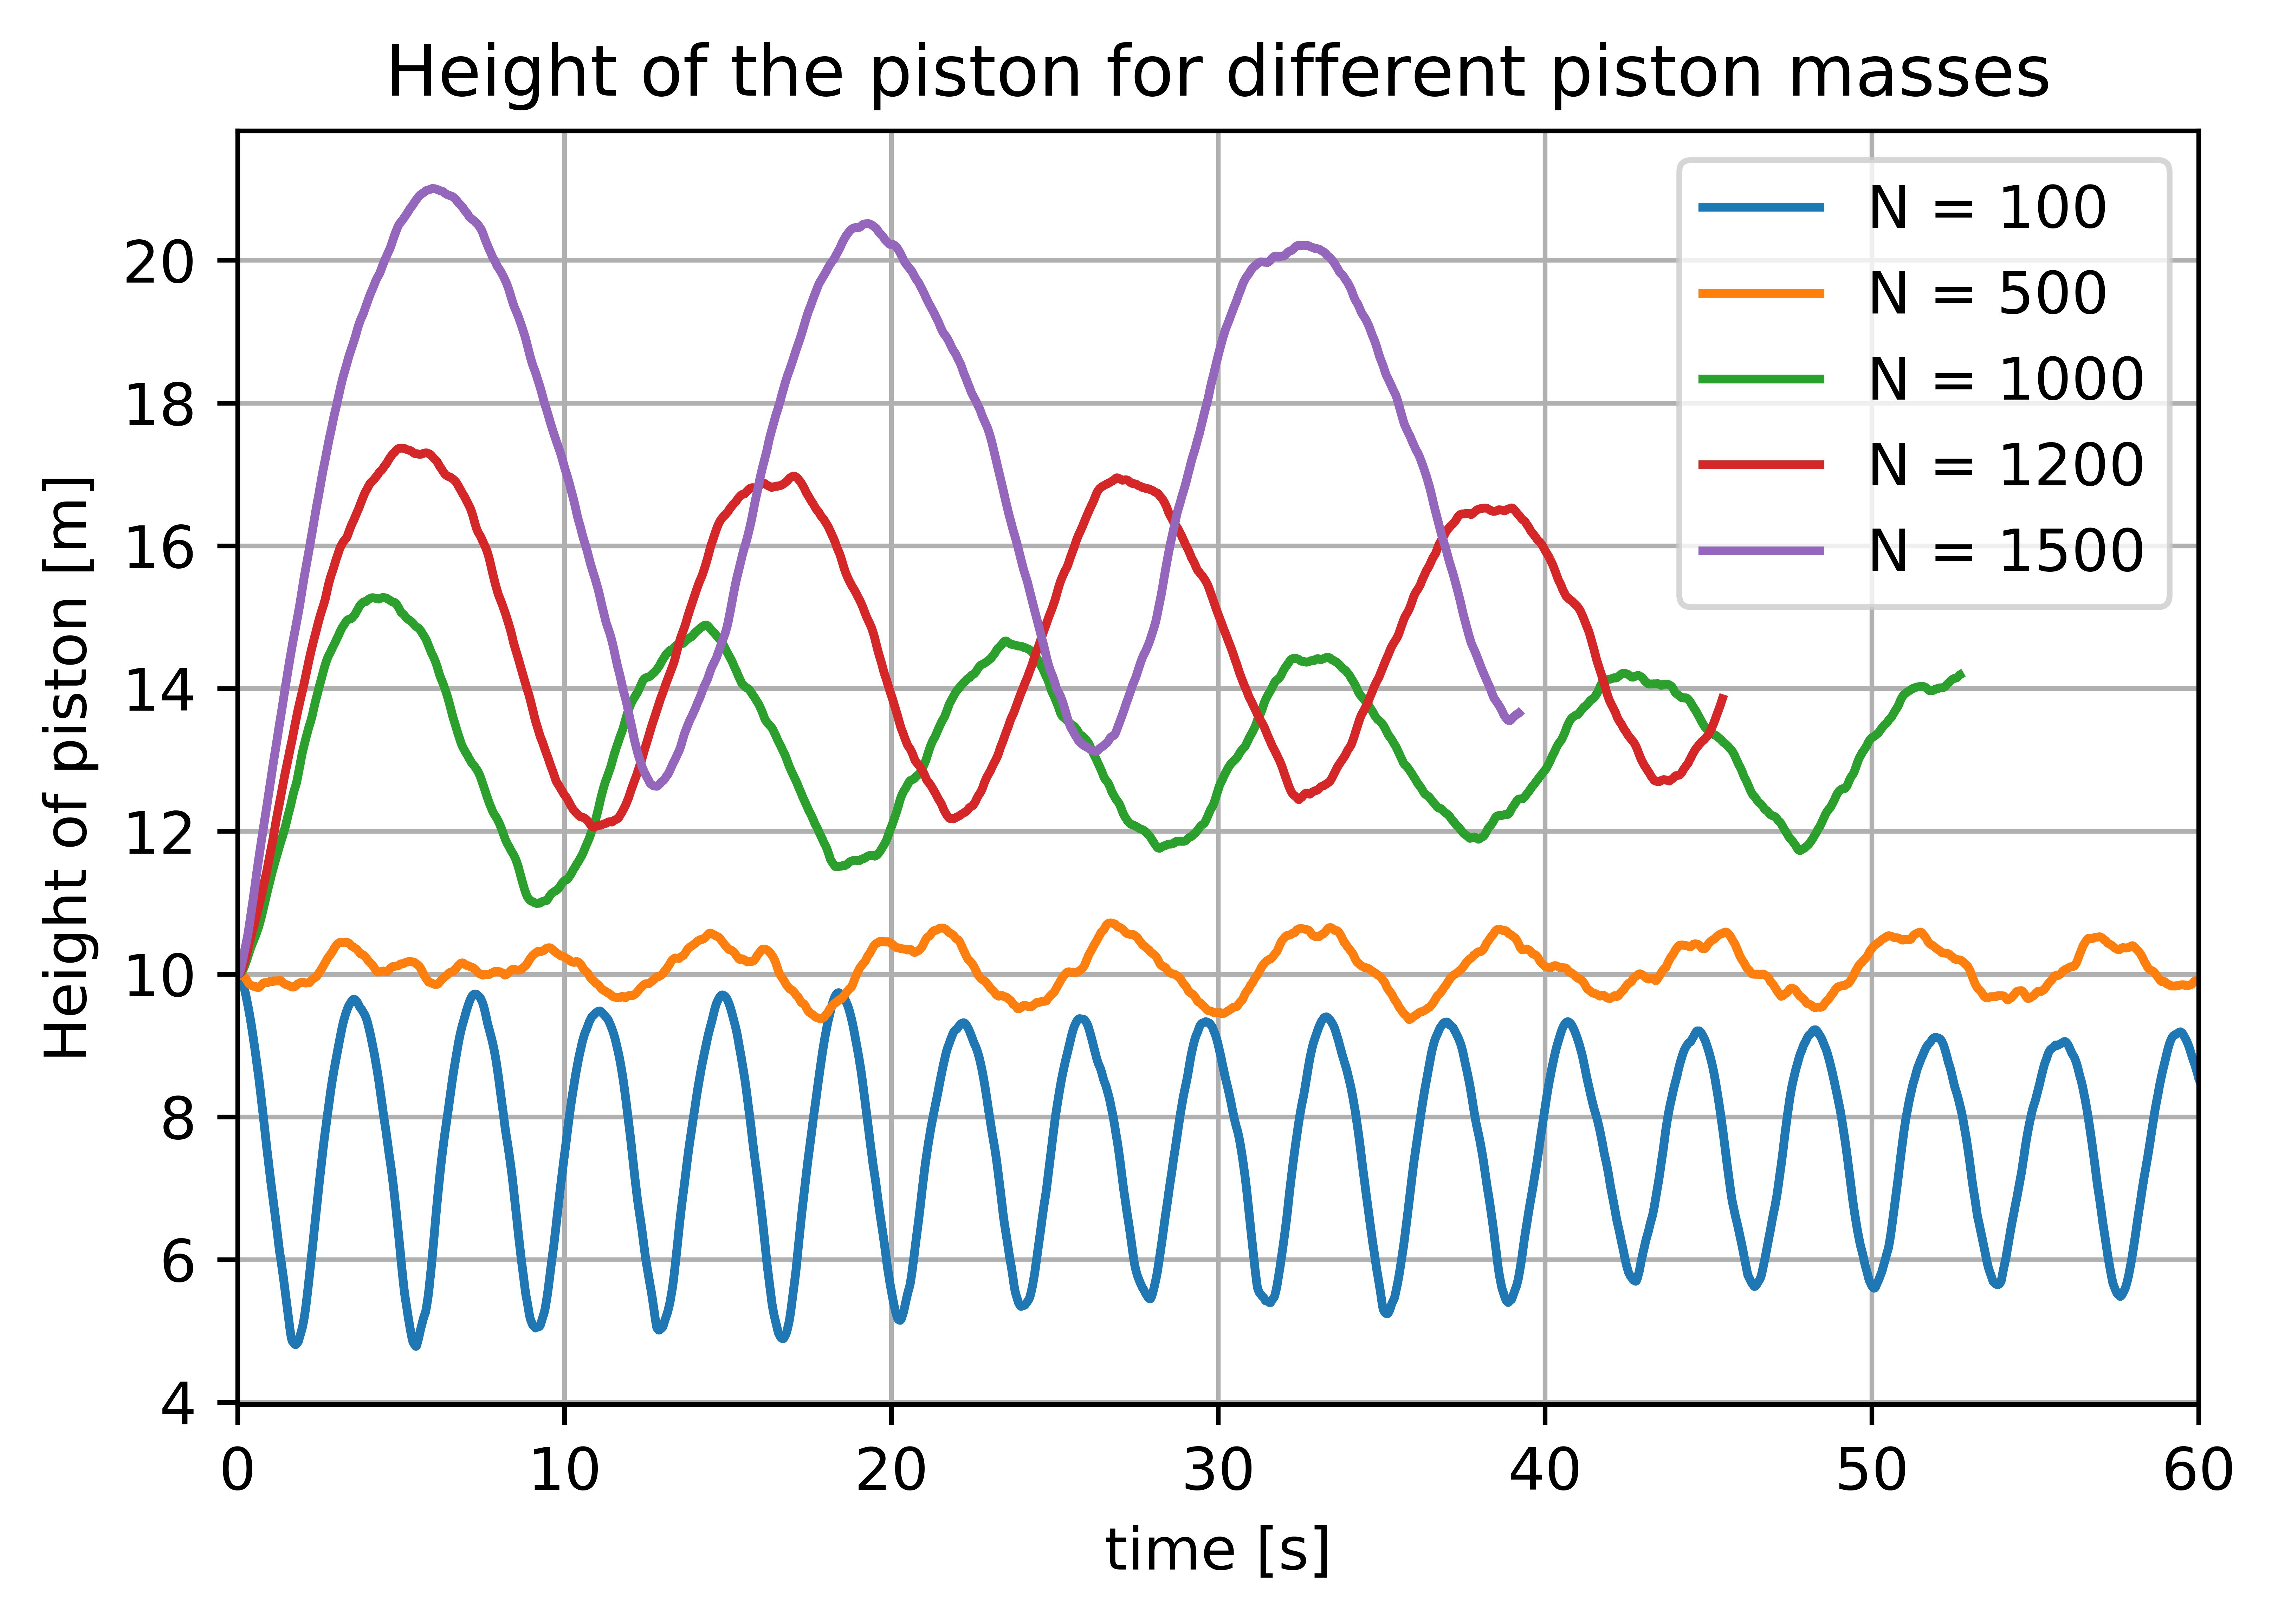

In [75]:
%%time
N_particles = np.array([100,500,1000,1200,1500])
avg_h = np.zeros(int(N_particles.size))
plt.figure(dpi=1200)
for i in range(N_particles.size):

    # Parameters
    kB = 1 
    g = -9.81 # m/s^2
    T = 2 # K
    m_part = 0.1  # kg
    m_pist = 10 # kg
    N = N_particles[i] # number of particles
    box_width = 10  # m
    MAX_INT = 9999999
    max_y = 10 # maximum height where the particles can be initialised

    # Store values for one timestep
    pist_height = 10  # m
    pist_vel = 0 
    part_pos = np.random.rand(N,2) # m
    part_vel = np.random.rand(N,2) # m/s

    mu = 0
    sigma = np.sqrt(kB*T/m_part)

    # Initialize positions and velocities for particles

    # Velocity using the velocity distribution
    part_vel[:,0] = np.random.normal(mu,sigma, N)
    part_vel[:,1] = np.random.normal(mu,sigma, N)
    # Position
    part_pos[:,0] = part_pos[:,0]*box_width
    part_pos[:,1] = part_pos[:,1]*max_y

    # Number of timesteps
    No=30000

    # Arrays to save data every timestep
    pist_v= np.zeros((No+1,2))
    pist_h = np.zeros(No+1)
    part_v = np.zeros((No+1,N,2))
    t = np.zeros(No+1)
    pist_h[0] = pist_height
    part_v[0] = part_vel

    for j in range(No):

        # Calculate hit times
        min_t, t_index, isPist = calc_hit_time(part_pos, part_vel, pist_height, pist_vel)
     
        # Plot system before collision   
        #if(j%3000==0):
            #plot_system(part_pos, part_vel, t_index, j, pist_height,pist_vel)
    
        # Recalculate positions and pist vel after min time
        part_pos = part_pos+part_vel*min_t
        pist_height = pist_height + pist_vel*min_t + g/2*min_t**2
        pist_vel = pist_vel+g*min_t

        # Recalculate velocity, check if the hit is with the piston or the other walls
        if(isPist):
            temp = part_vel[t_index[0],1]
            part_vel[t_index[0],1]=(m_part-m_pist)/(m_part+m_pist)*temp+2*m_pist/(m_part+m_pist)*pist_vel
            # Place particle bit under the piston so its not left behind
            part_pos[t_index[0],1]=pist_height-0.01
            pist_vel=2*m_part/(m_part+m_pist)*temp+(m_pist-m_part)/(m_pist+m_part)*pist_vel
        else:
            if (t_index[1]==0 or t_index[1]==1):
                part_vel[t_index[0],0] = -part_vel[t_index[0],0]
            else:
                part_vel[t_index[0],1] = -part_vel[t_index[0],1]
        # Save data for plotting
        pist_h[j+1] = pist_height
        pist_v[j+1] = pist_vel
        part_v[j+1] = part_vel
        t[j+1]=t[j]+min_t
    #title = str(i)+"th_run.txt"
    #np.savetxt(title, pist_h, delimiter=',') 
    print(N_particles[i])
    #lab = "M = {0}".format(M[i])
    plt.plot(t,pist_h,label="N = {0}".format(N_particles[i]))
    plt.legend(loc='upper right')
    plt.xlabel('time [s]')
    plt.ylabel('Height of piston [m]')
    #plt.ylim(0,26)
    plt.xlim(0,60)
    plt.title("Height of the piston for different number of particles")
plt.grid()
plt.savefig("pic5.png")

100
200
300
400
500
600
Wall time: 45min 44s


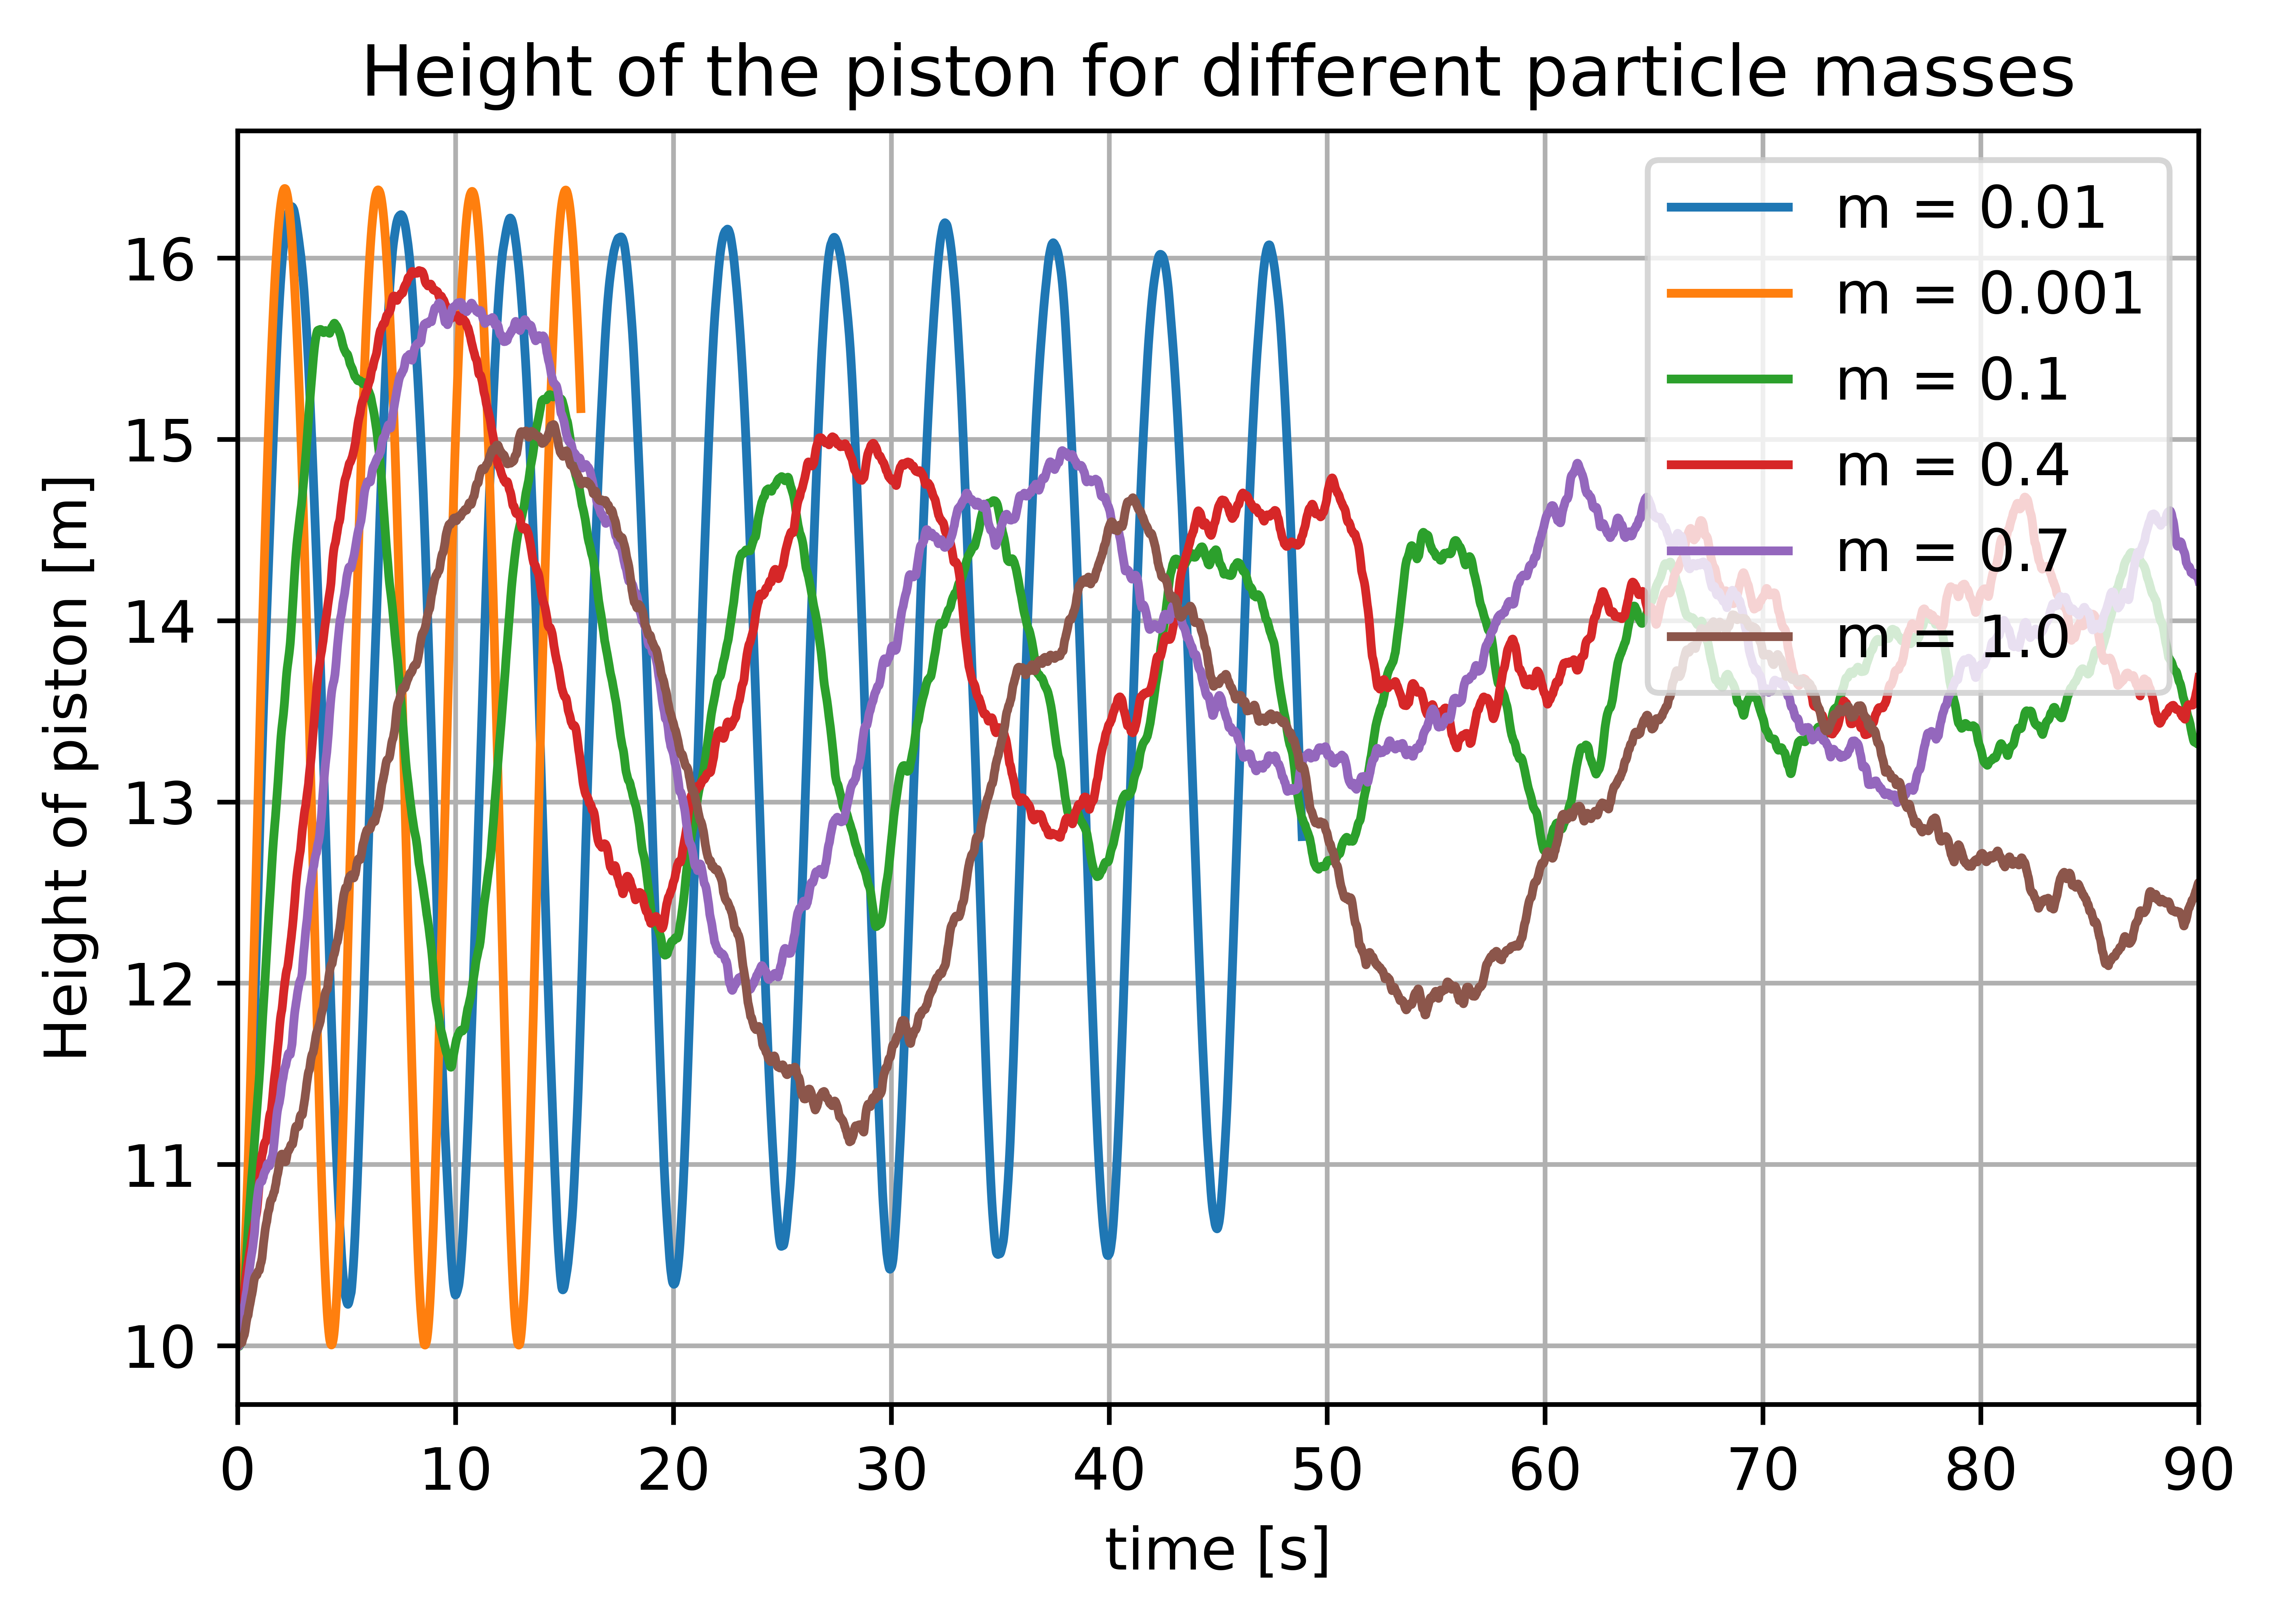

In [89]:
%%time
m_particles = np.array([0.01,0.4,1])
plt.figure(dpi=1200)
for i in range(m_particles.size):

    # Parameters
    kB = 1 
    g = -9.81 # m/s^2
    T = 2 # K
    m_part = m_particles[i]  # kg
    m_pist = 10 # kg
    N = 1000 # number of particles
    box_width = 10  # m
    MAX_INT = 9999999
    max_y = 10 # maximum height where the particles can be initialised

    # Store values for one timestep
    pist_height = 10  # m
    pist_vel = 0 
    part_pos = np.random.rand(N,2) # m
    part_vel = np.random.rand(N,2) # m/s

    mu = 0
    sigma = np.sqrt(kB*T/m_part)

    # Initialize positions and velocities for particles

    # Velocity using the velocity distribution
    part_vel[:,0] = np.random.normal(mu,sigma, N)
    part_vel[:,1] = np.random.normal(mu,sigma, N)
    # Position
    part_pos[:,0] = part_pos[:,0]*box_width
    part_pos[:,1] = part_pos[:,1]*max_y

    # Number of timesteps
    No=90000

    # Arrays to save data every timestep
    pist_v= np.zeros((No+1,2))
    pist_h = np.zeros(No+1)
    part_v = np.zeros((No+1,N,2))
    t = np.zeros(No+1)
    pist_h[0] = pist_height
    part_v[0] = part_vel

    for j in range(No):

        # Calculate hit times
        min_t, t_index, isPist = calc_hit_time(part_pos, part_vel, pist_height, pist_vel)
     
        # Plot system before collision   
        #if(j%3000==0):
            #plot_system(part_pos, part_vel, t_index, j, pist_height,pist_vel)
    
        # Recalculate positions and pist vel after min time
        part_pos = part_pos+part_vel*min_t
        pist_height = pist_height + pist_vel*min_t + g/2*min_t**2
        pist_vel = pist_vel+g*min_t

        # Recalculate velocity, check if the hit is with the piston or the other walls
        if(isPist):
            temp = part_vel[t_index[0],1]
            part_vel[t_index[0],1]=(m_part-m_pist)/(m_part+m_pist)*temp+2*m_pist/(m_part+m_pist)*pist_vel
            # Place particle bit under the piston so its not left behind
            part_pos[t_index[0],1]=pist_height-0.01
            pist_vel=2*m_part/(m_part+m_pist)*temp+(m_pist-m_part)/(m_pist+m_part)*pist_vel
        else:
            if (t_index[1]==0 or t_index[1]==1):
                part_vel[t_index[0],0] = -part_vel[t_index[0],0]
            else:
                part_vel[t_index[0],1] = -part_vel[t_index[0],1]
        # Save data for plotting
        pist_h[j+1] = pist_height
        pist_v[j+1] = pist_vel
        part_v[j+1] = part_vel
        t[j+1]=t[j]+min_t
    #title = str(i)+"th_run.txt"
    #np.savetxt(title, pist_h, delimiter=',') 
    print(N_particles[i])
    #lab = "M = {0}".format(M[i])
    plt.plot(t,pist_h,label="m = {0}".format(m_particles[i]))
    plt.legend(loc='upper right')
    plt.xlabel('time [s]')
    plt.ylabel('Height of piston [m]')
    #plt.ylim(0,26)
    plt.xlim(0,90)
    plt.title("Height of the piston for different particle masses")
plt.grid()
plt.savefig("pic6.png")